In [158]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [159]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [160]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Technocolabs project/cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,1


Exploring the Response Variable and Concluding the Initial Exploration

In [161]:
df['default payment next month'].mean()

0.2217971797179718

In [162]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

Introduction to Scikit-Learn

In [163]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
my_new_lr.C = 0.1
my_new_lr.solver = 'lbfgs'#'liblinear'
my_new_lr.multi_class = 'multinomial'
my_new_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [167]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [168]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [170]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [171]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

Generating Synthetic Data

In [172]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

Data for a Linear Regression

In [173]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

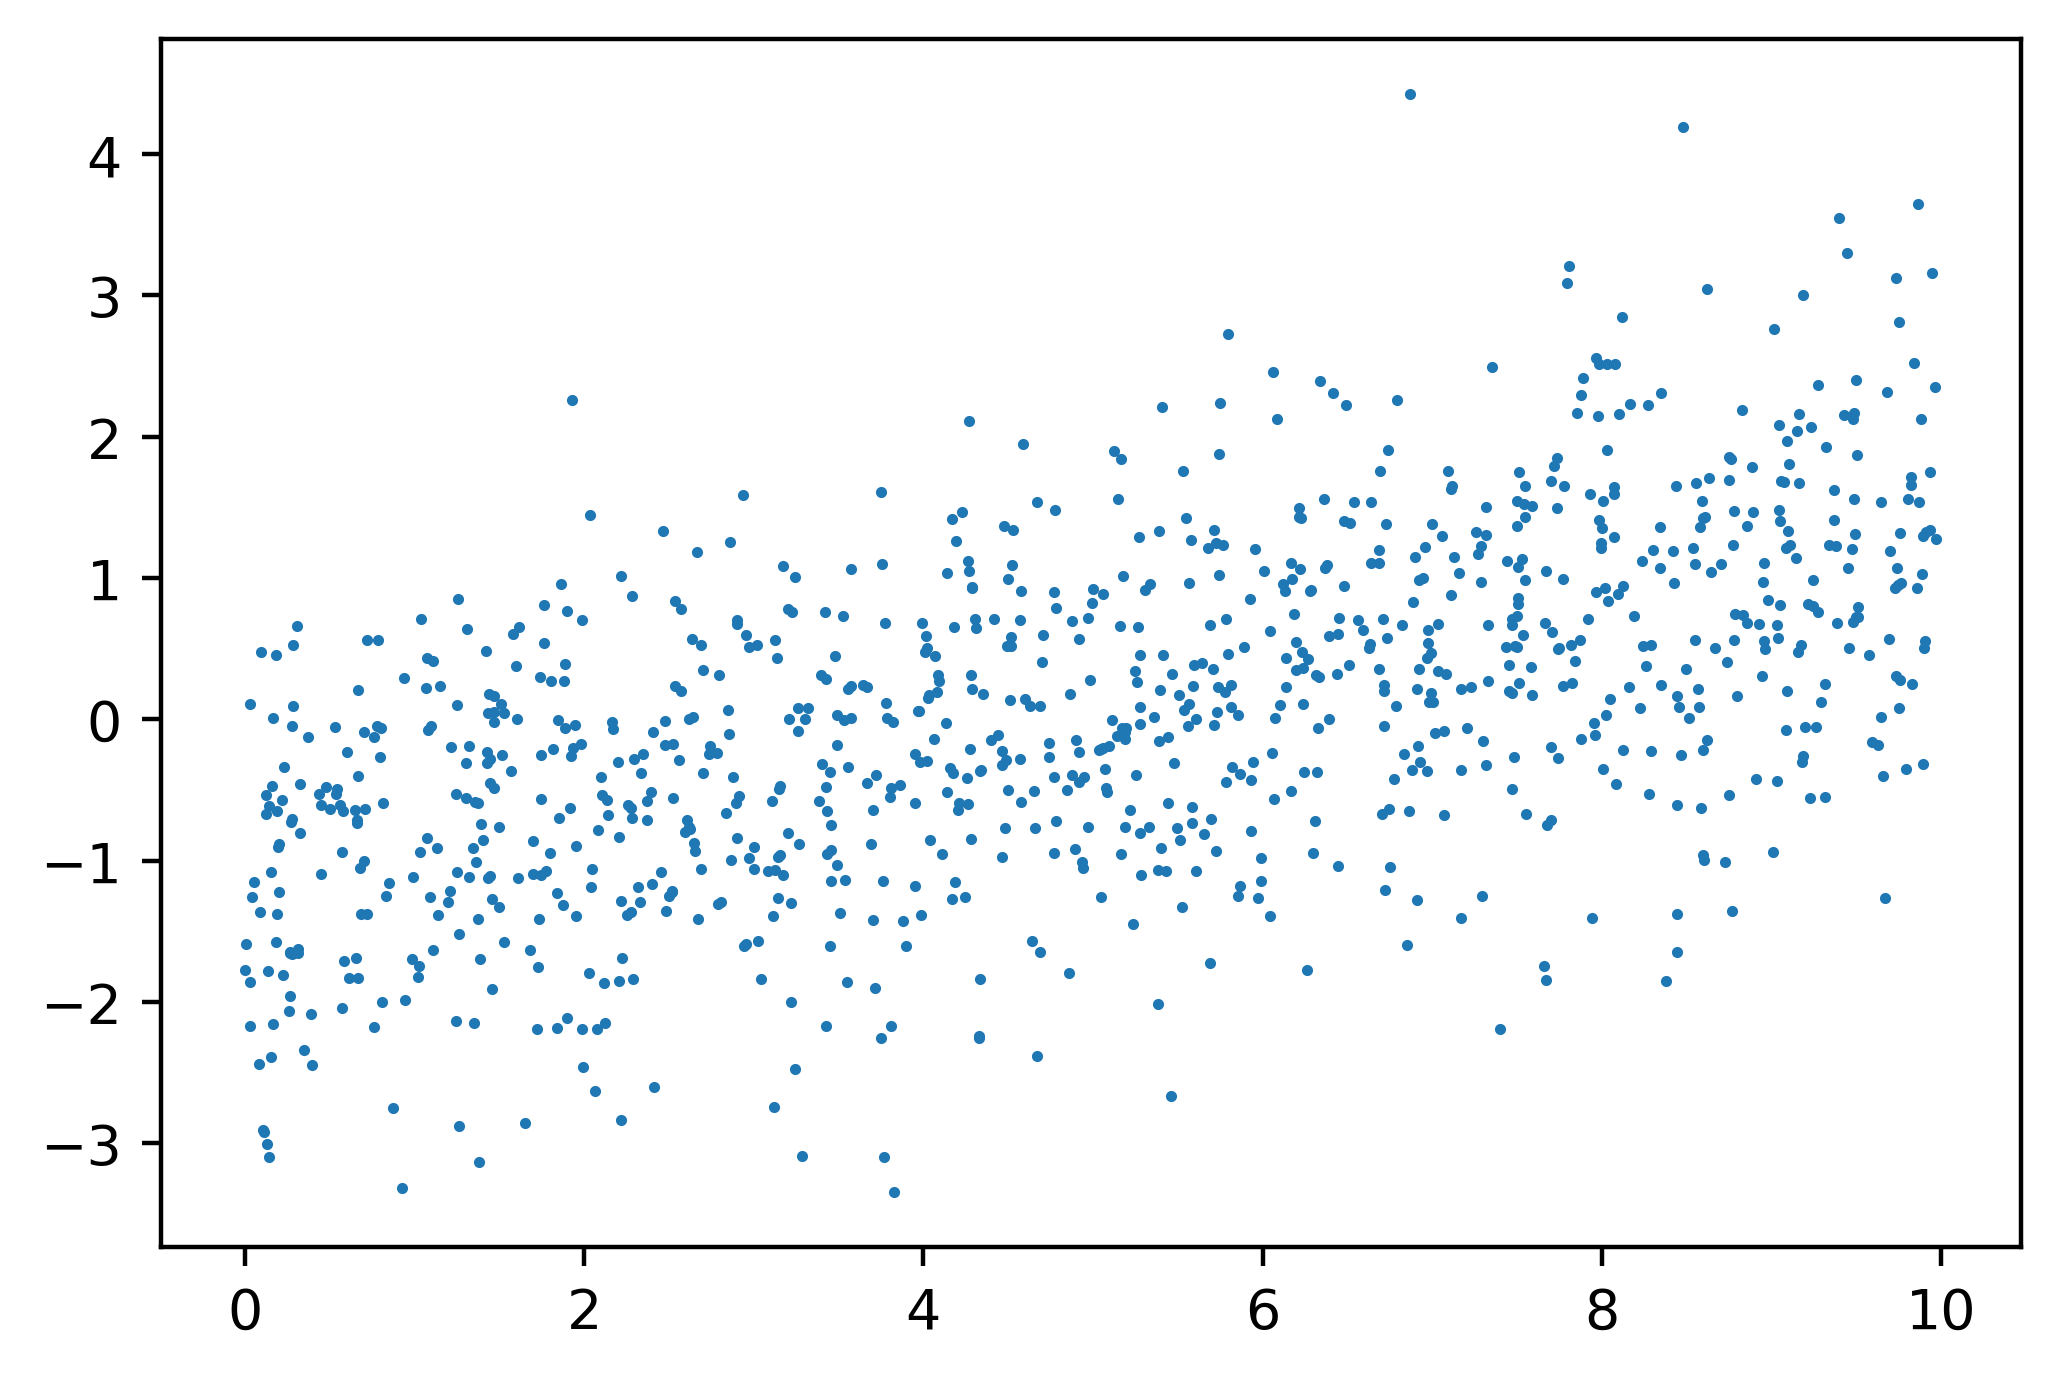

In [174]:
plt.scatter(X,y,s=1)

Linear Regression in Scikit-Learn

In [175]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825888
[0.24002588]


In [177]:
y_pred = lin_reg.predict(X.reshape(-1,1))

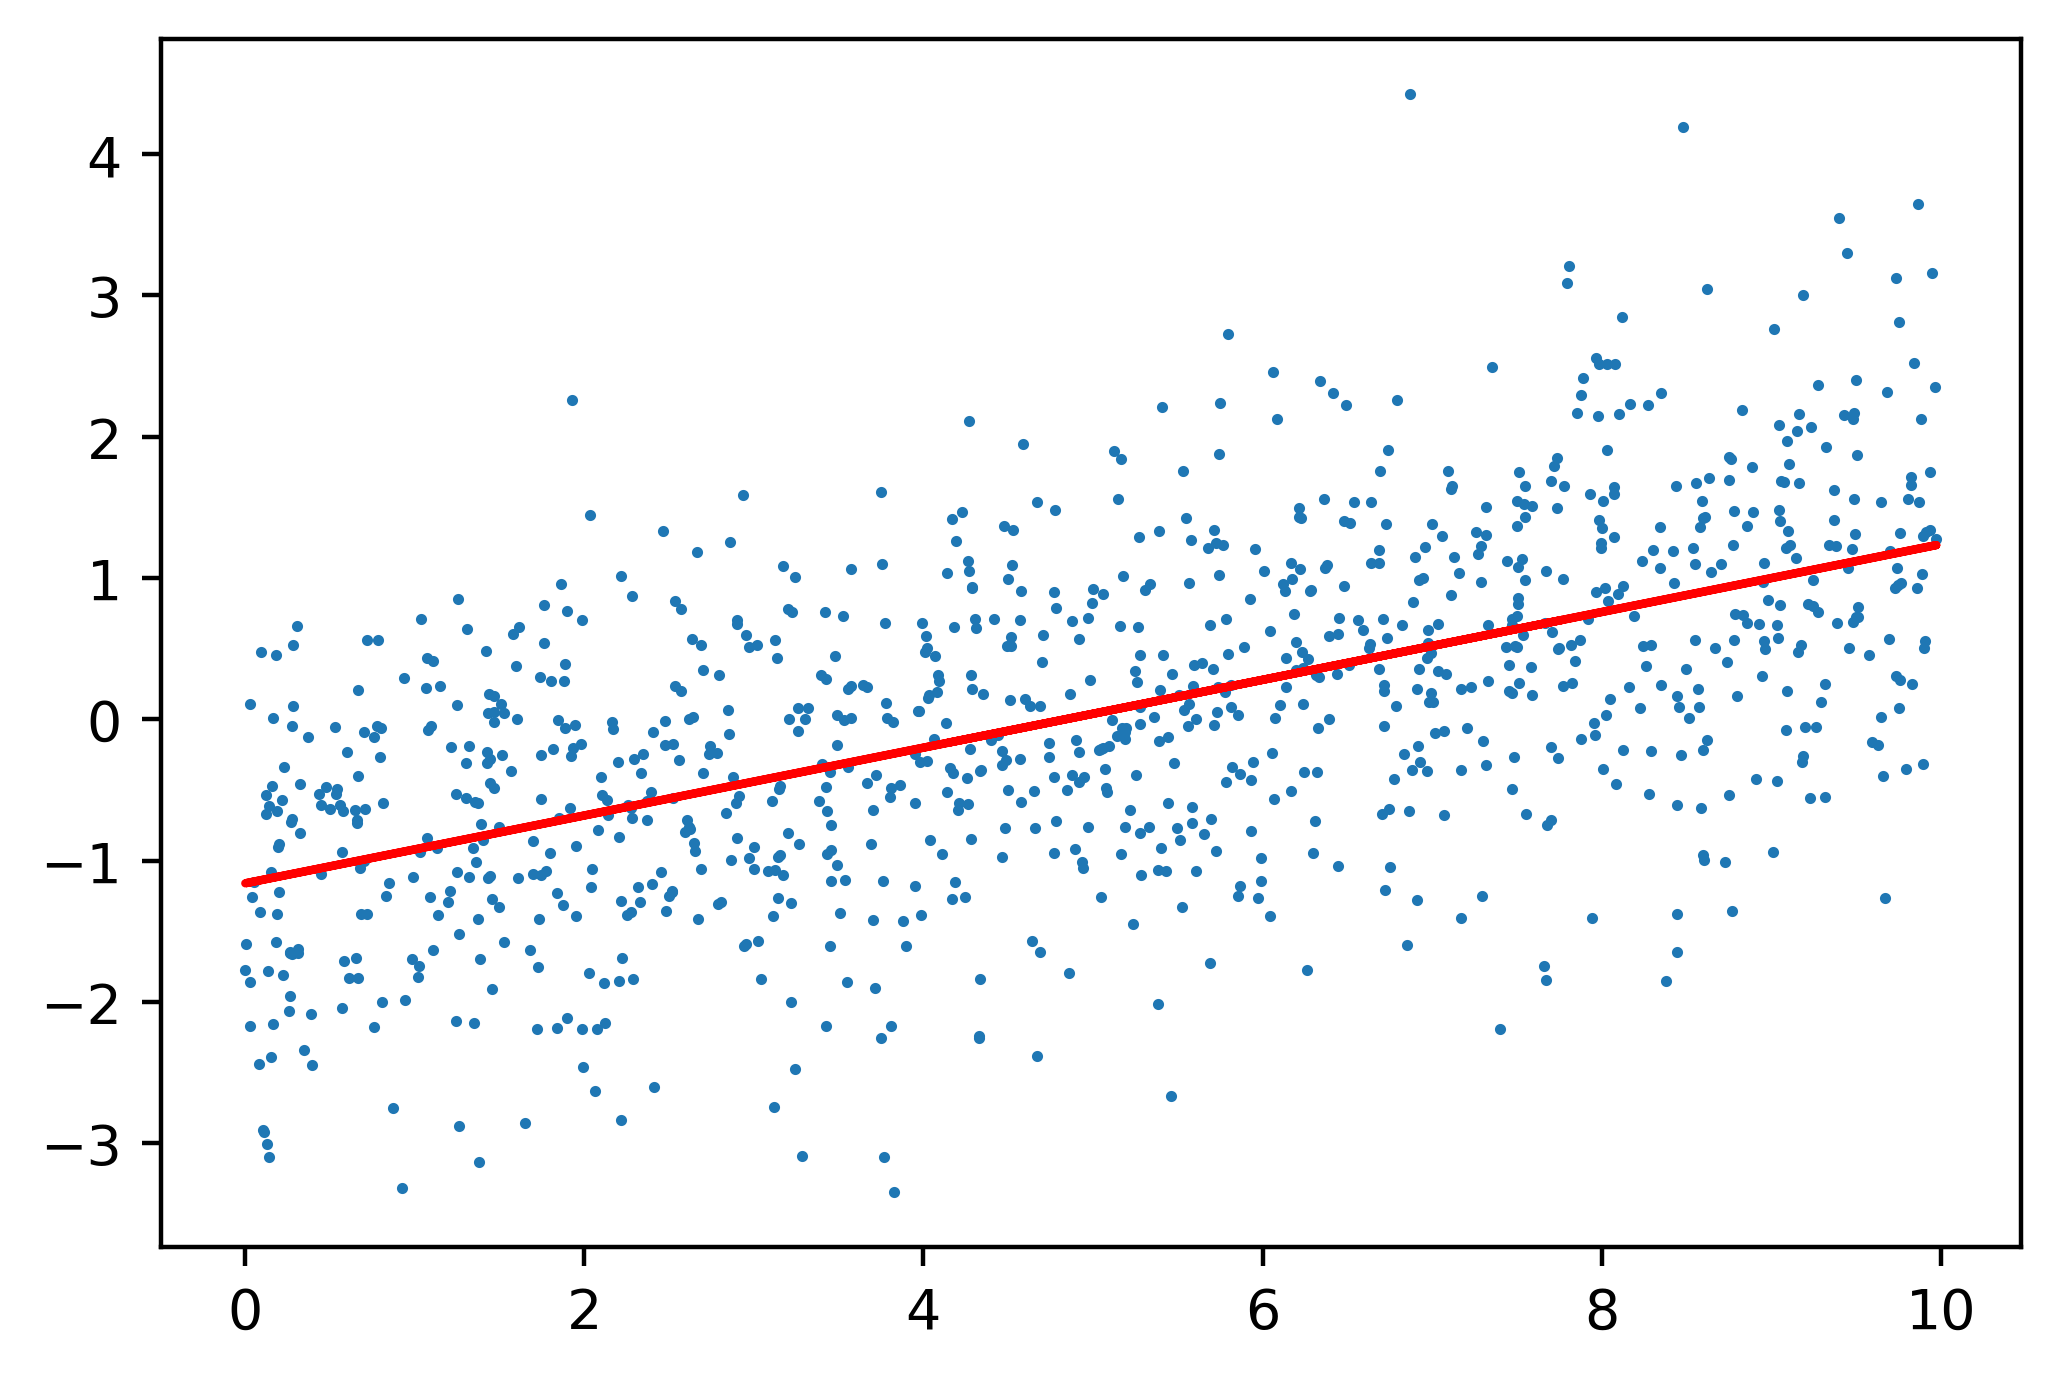

In [178]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

Splitting the Data: Training and Testing sets

In [179]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [180]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [181]:
np.mean(y_train1)

0.223102526838873

In [182]:
np.mean(y_test1)

0.21657603600225014

Classification Accuracy

In [183]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='multinomial', n_jobs=None, \
                                penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, \
                                verbose=0, warm_start=False)

In [184]:
example_lr.fit(X_train1, y_train1)
y_pred1 = example_lr.predict(X_test1)

In [185]:
is_correct = y_pred1 == y_test1
np.mean(is_correct)

0.7834239639977498

In [186]:
example_lr.score(X_test1, y_test1)
from sklearn import metrics
metrics.accuracy_score(y_test1, y_pred1)

0.7834239639977498

Calculating the True and False Positive and Negative Rates and Confusion Matrix in Python

In [187]:
P = sum(y_test1)
P

1155

In [188]:
TP = sum( (y_test1==1) & (y_pred1==1) )
TP

0

In [189]:
TPR = TP/P
TPR

0.0

In [190]:
FN = sum( (y_test1==1) & (y_pred1==0) )
FN

1155

In [191]:
FNR = FN/P
FNR

1.0

In [192]:
N = sum(y_test1==0)
TN = sum((y_test1==0) & (y_pred1==0))
FP = sum((y_test1==0) & (y_pred1==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [193]:
metrics.confusion_matrix(y_test1, y_pred1)

array([[4178,    0],
       [1155,    0]])

Obtaining Predicted Probabilities from a Trained Logistic Regression Model

In [194]:
y_pred_proba = example_lr.predict_proba(X_test1)
y_pred_proba

array([[0.77460641, 0.22539359],
       [0.77460641, 0.22539359],
       [0.79038452, 0.20961548],
       ...,
       [0.79038452, 0.20961548],
       [0.79038452, 0.20961548],
       [0.79038452, 0.20961548]])

In [195]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [196]:
prob_sum.shape

(5333,)

In [197]:
np.unique(prob_sum)

array([1.])

In [198]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22539359, 0.22539359, 0.20961548, ..., 0.20961548, 0.20961548,
       0.20961548])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.20961548, 0.21459505, 0.21957462, 0.22455419, 0.22953376,
        0.23451333, 0.2394929 , 0.24447248, 0.24945205, 0.25443162,
        0.25941119]),
 <a list of 10 Patch objects>)

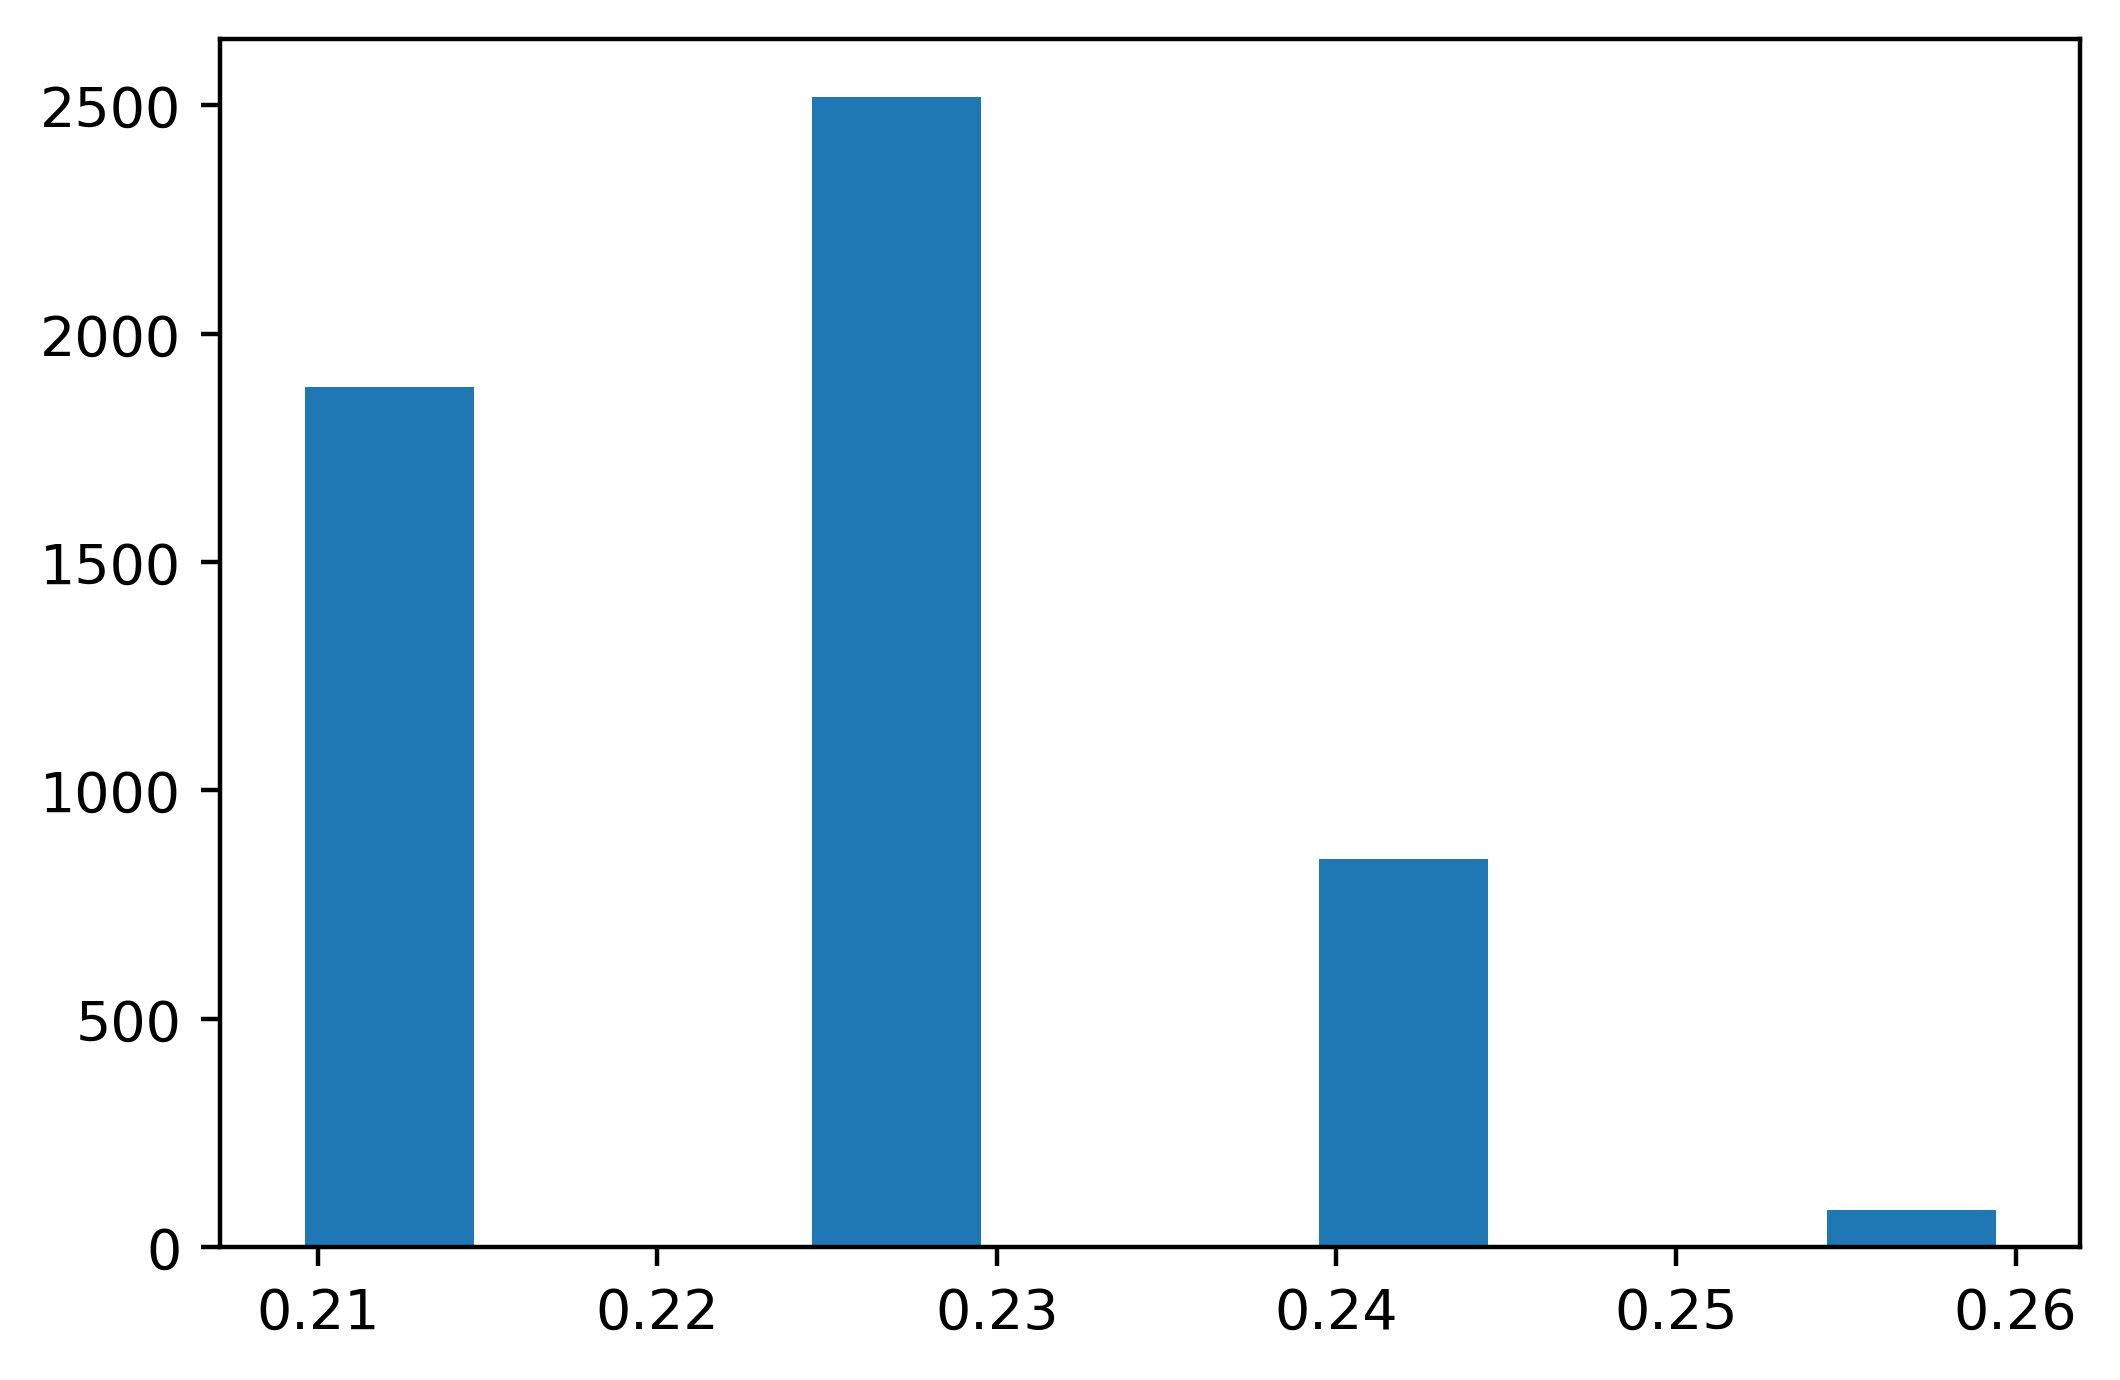

In [199]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

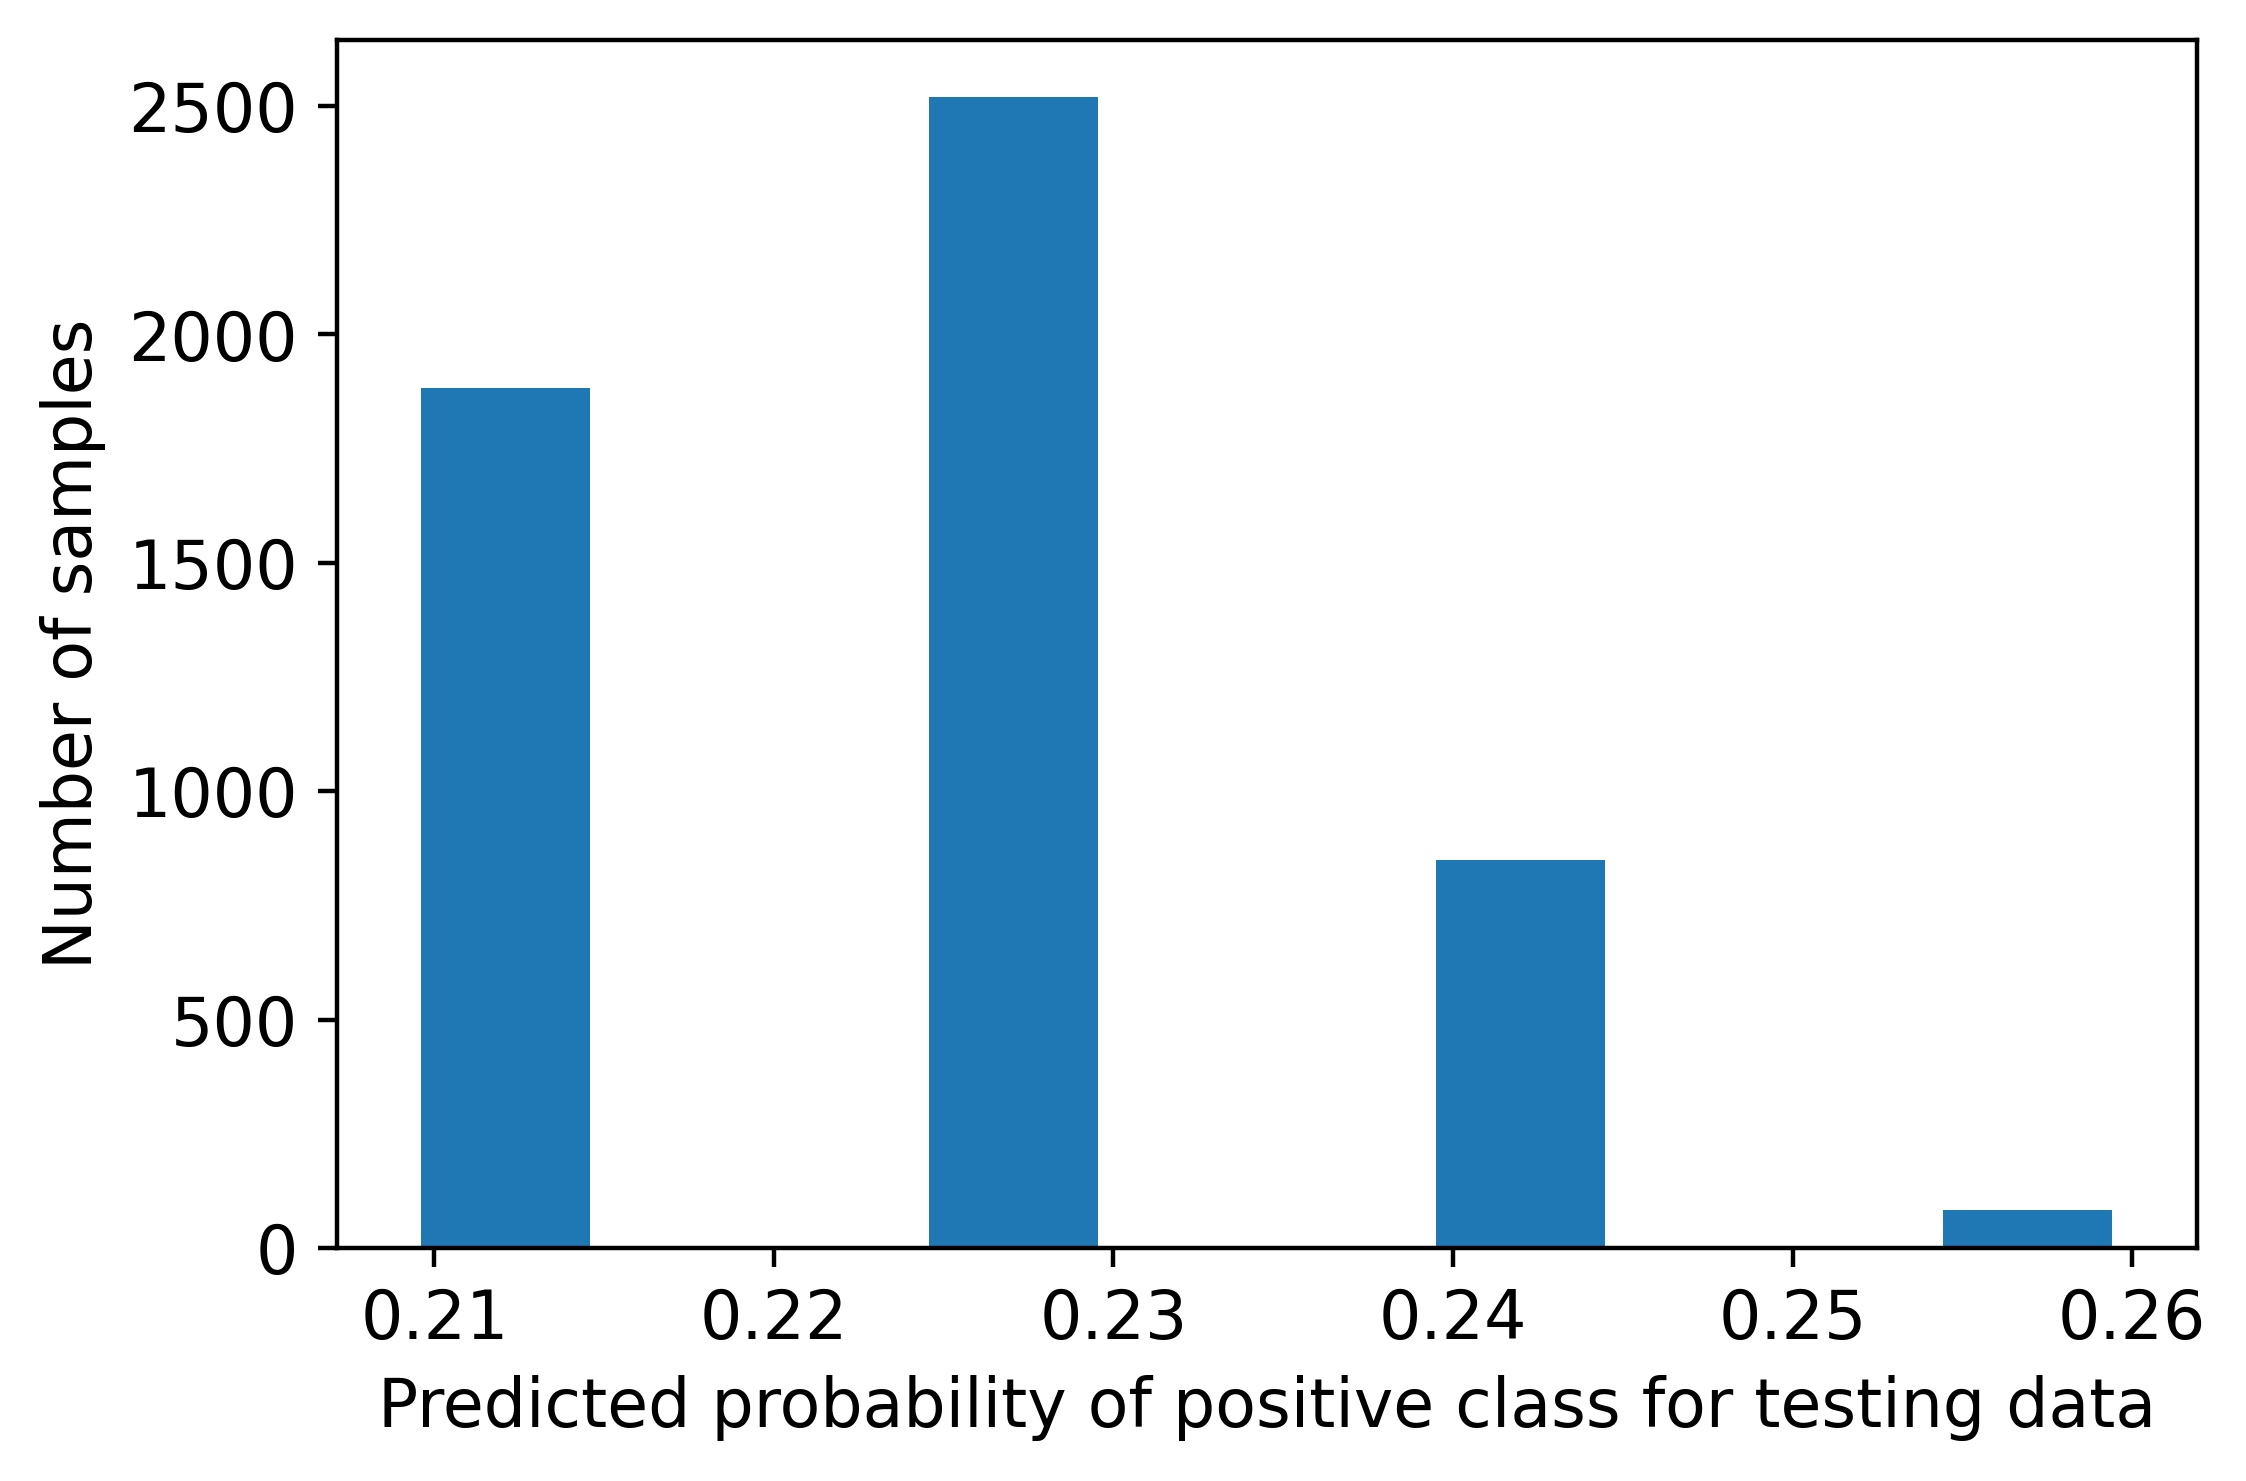

In [200]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [201]:
pos_sample_pos_proba = pos_proba[y_test1==1]
neg_sample_pos_proba = pos_proba[y_test1==0]

Text(0, 0.5, 'Number of samples')

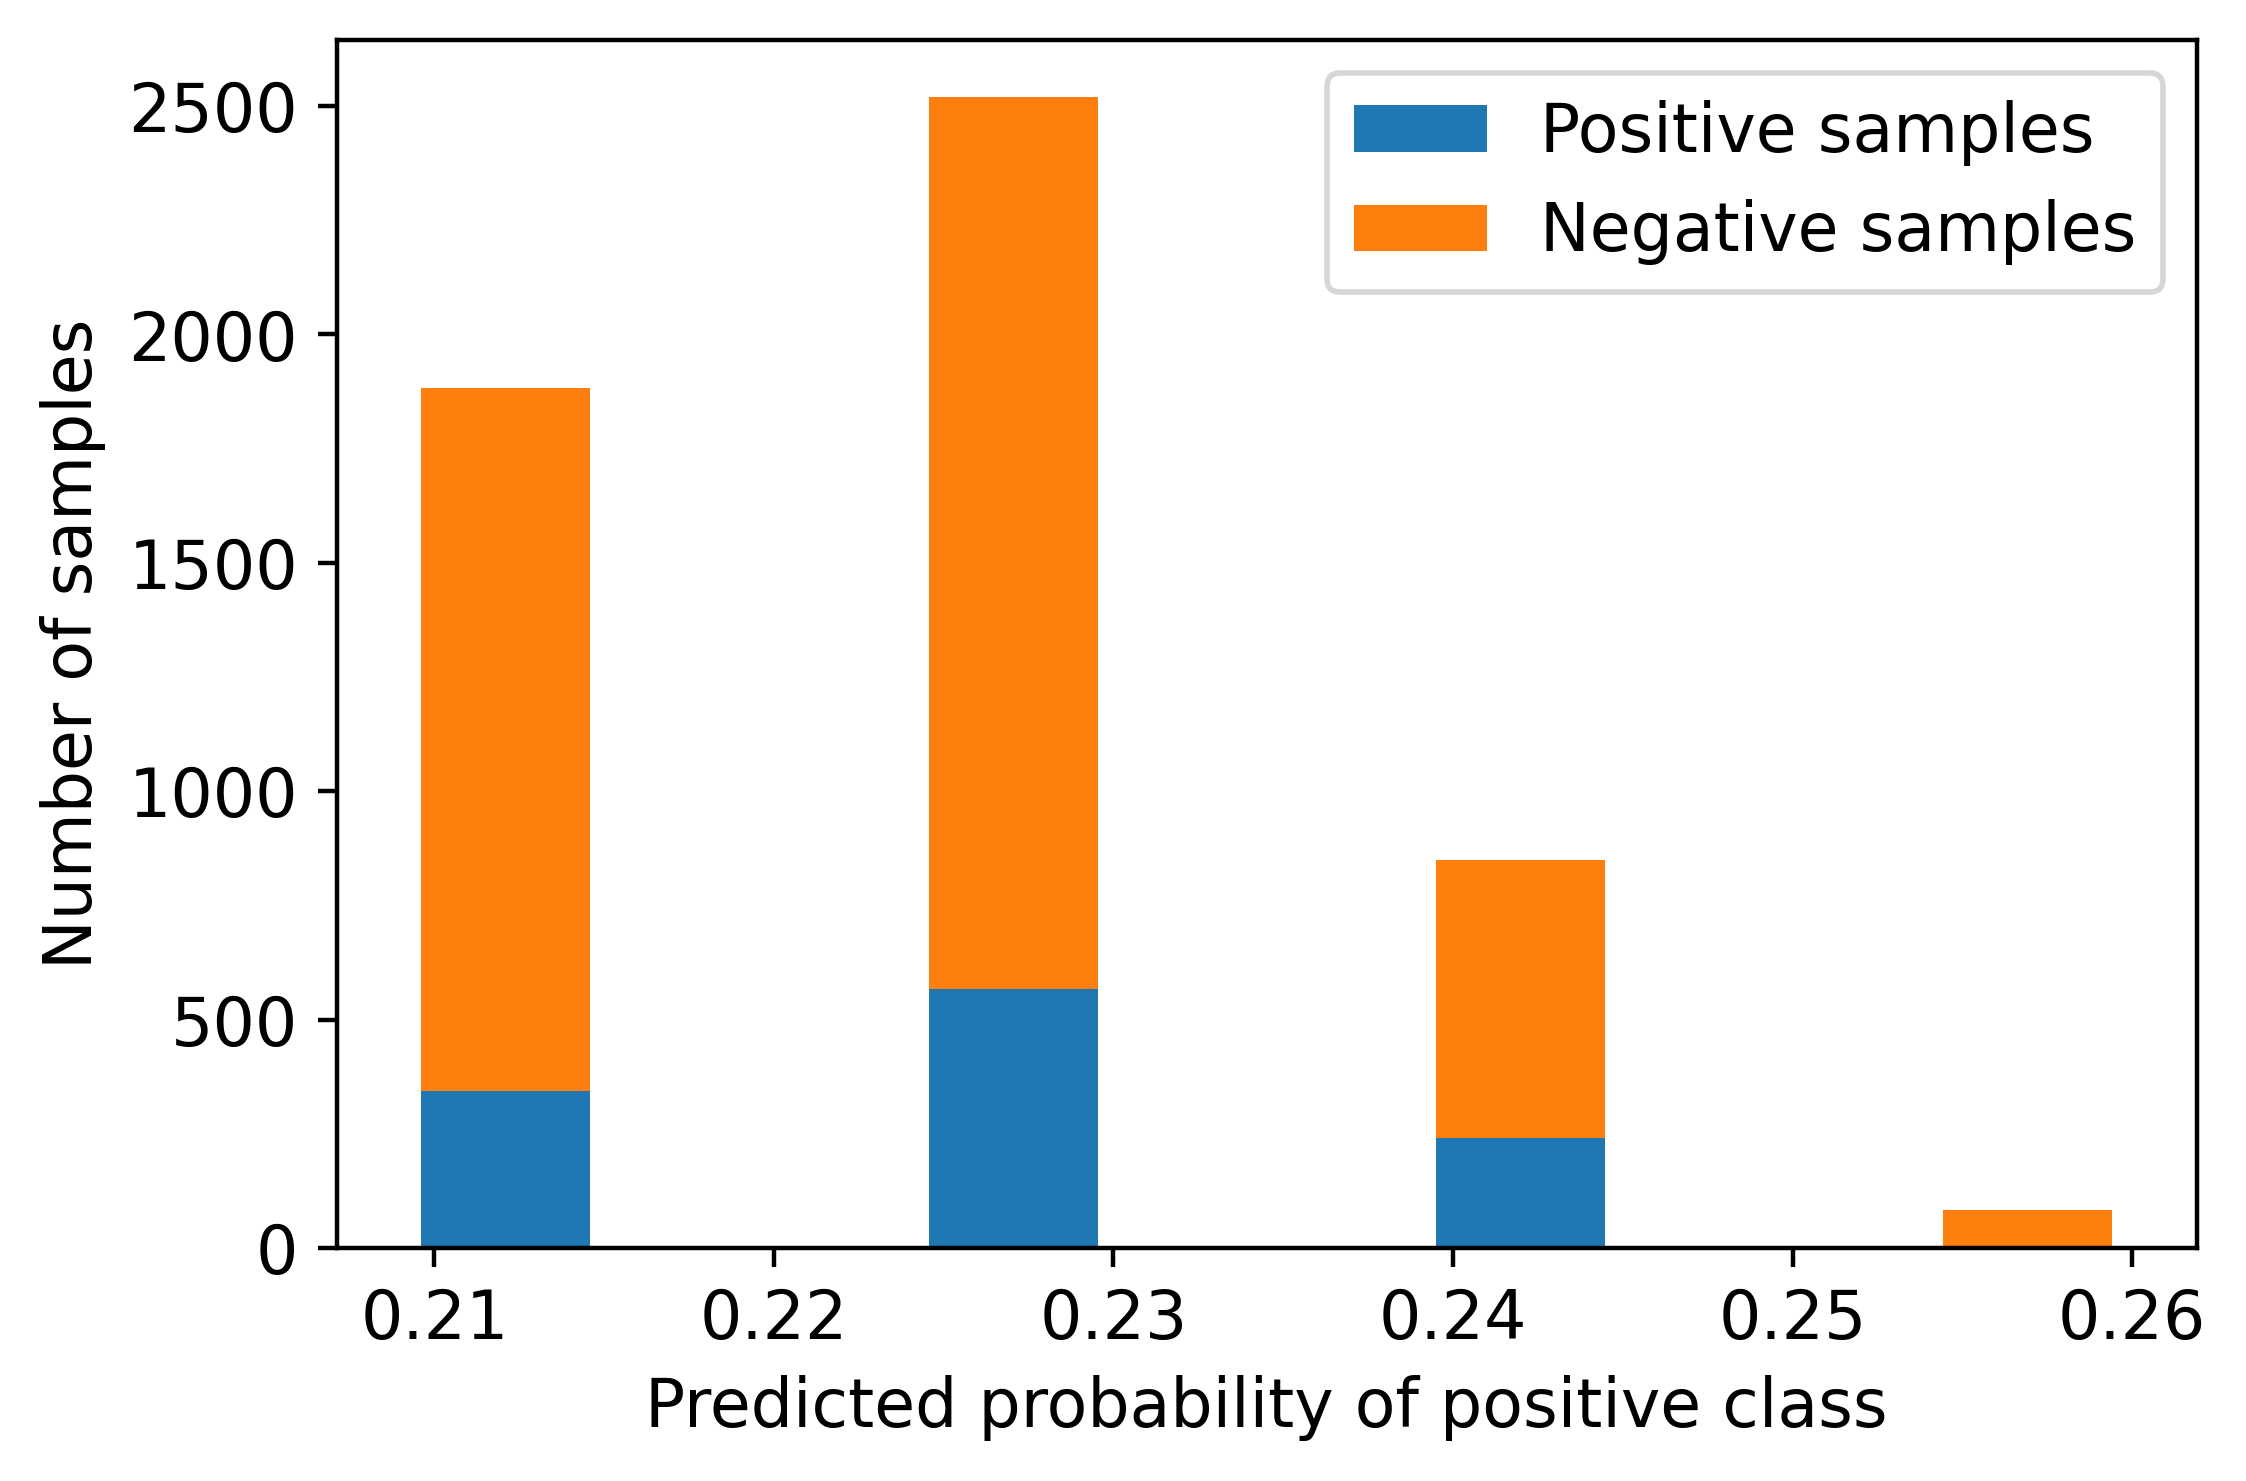

In [202]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [203]:
y_test1.shape, y_pred1.shape

((5333,), (5333,))

The Receiver Operating Characteristic (ROC) Curve

In [204]:
from sklearn import metrics
fpr, tpr, thresholds1 = metrics.roc_curve(y_test1, pos_proba)
print(fpr, tpr, thresholds1)

[0.         0.01842987 0.16419339 0.63140258 1.        ] [0.         0.004329   0.21212121 0.7030303  1.        ] [1.25941119 0.25941119 0.24199571 0.22539359 0.20961548]


Text(0.5, 1.0, 'ROC curve')

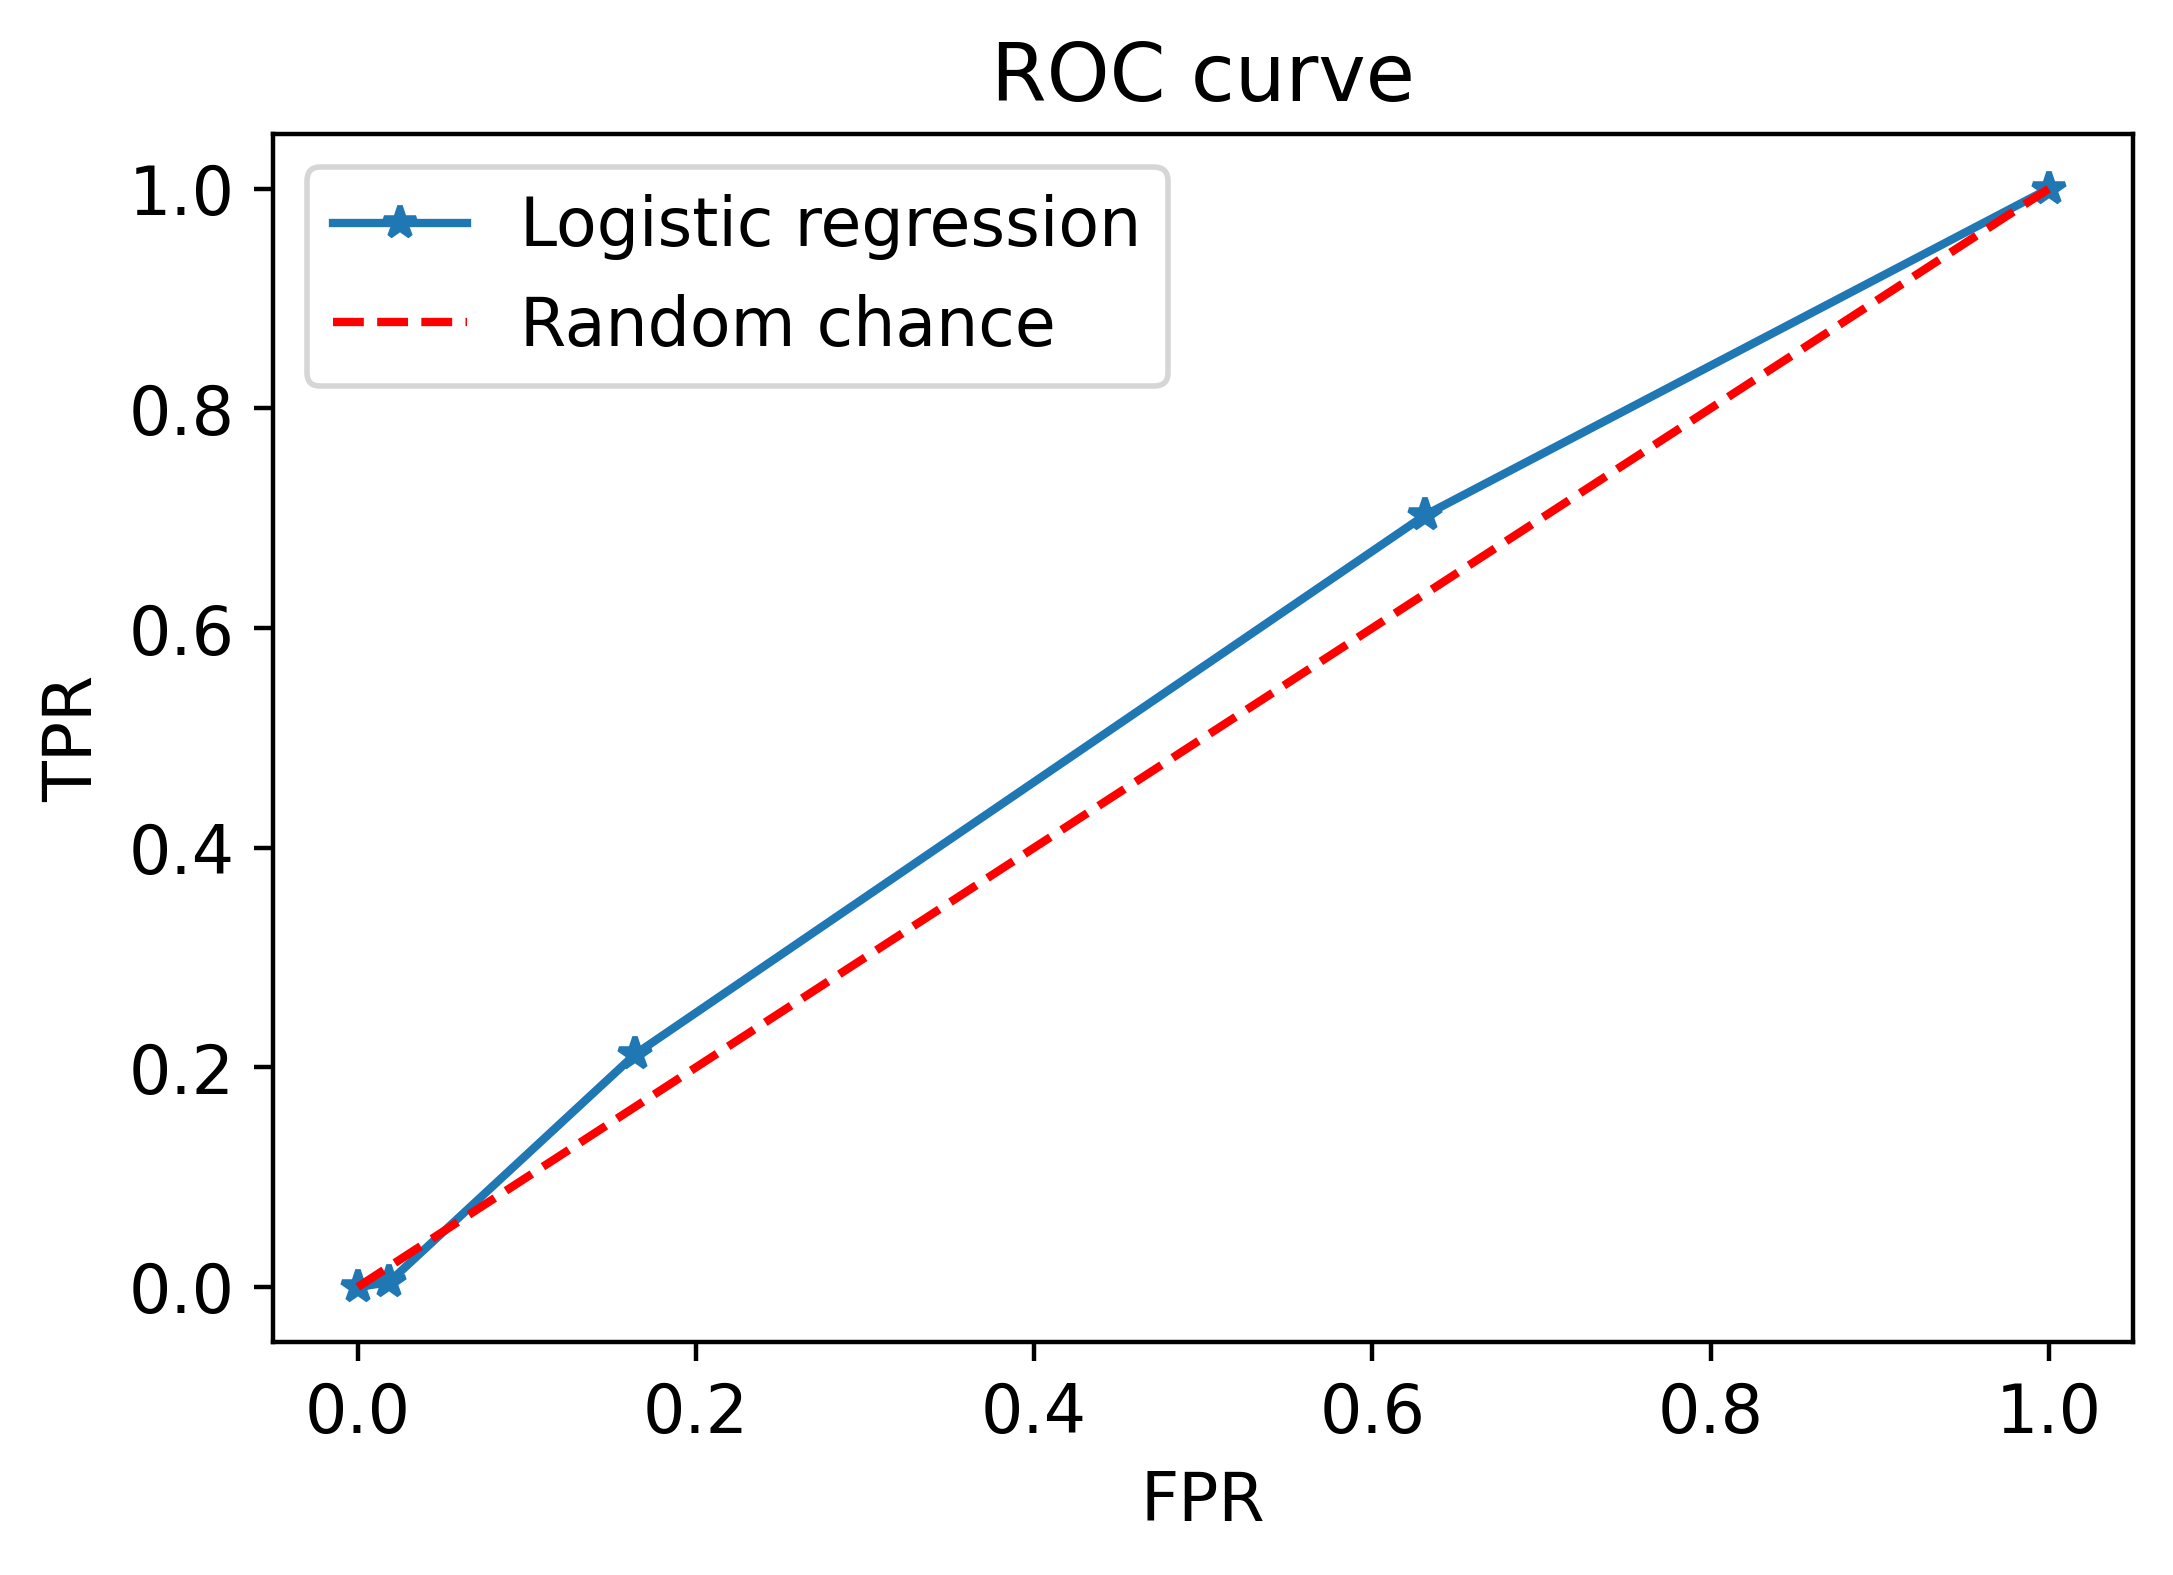

In [205]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [206]:
thresholds1

array([1.25941119, 0.25941119, 0.24199571, 0.22539359, 0.20961548])

In [207]:
metrics.roc_auc_score(y_test1, pos_proba)

0.5434650477972642

Real ans

In [208]:
#krna hai
from sklearn.model_selection import train_test_split
x1 = df['LIMIT_BAL'].values.reshape(-1,1)
y1 = df['default payment next month'].values

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=24)

In [209]:
#krna hai
x1

array([[ 20000],
       [120000],
       [ 90000],
       ...,
       [ 30000],
       [ 80000],
       [ 50000]])

In [210]:
#krna hai
y1

array([1, 1, 0, ..., 1, 1, 1])

In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [212]:
#krna hai
clf = LogisticRegression().fit(x1,y1)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [213]:
#krna hai
from sklearn.metrics import accuracy_score
Y_pred=clf.predict(X_test)
print(accuracy_score(y_test, Y_pred))

0.7834239639977498


_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [214]:
N1 = sum(y_test==0)
TN1 = sum((y_test==0) & (Y_pred==0))
FP1 = sum((y_test==0) & (Y_pred==1))
TNR1 = TN1/N1
FPR1 = FP1/N1
print('The true negative rate is {} and the false positive rate is {}'.format(TNR1, FPR1))

The true negative rate is 1.0 and the false positive rate is 0.0


In [215]:
y_pred_proba1 = example_lr.predict_proba(X_test)
y_pred_proba1

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [216]:
pos_proba1 = y_pred_proba1[:,1]
pos_proba1

array([1., 1., 1., ..., 1., 1., 1.])

Text(0, 0.5, 'Number of samples')

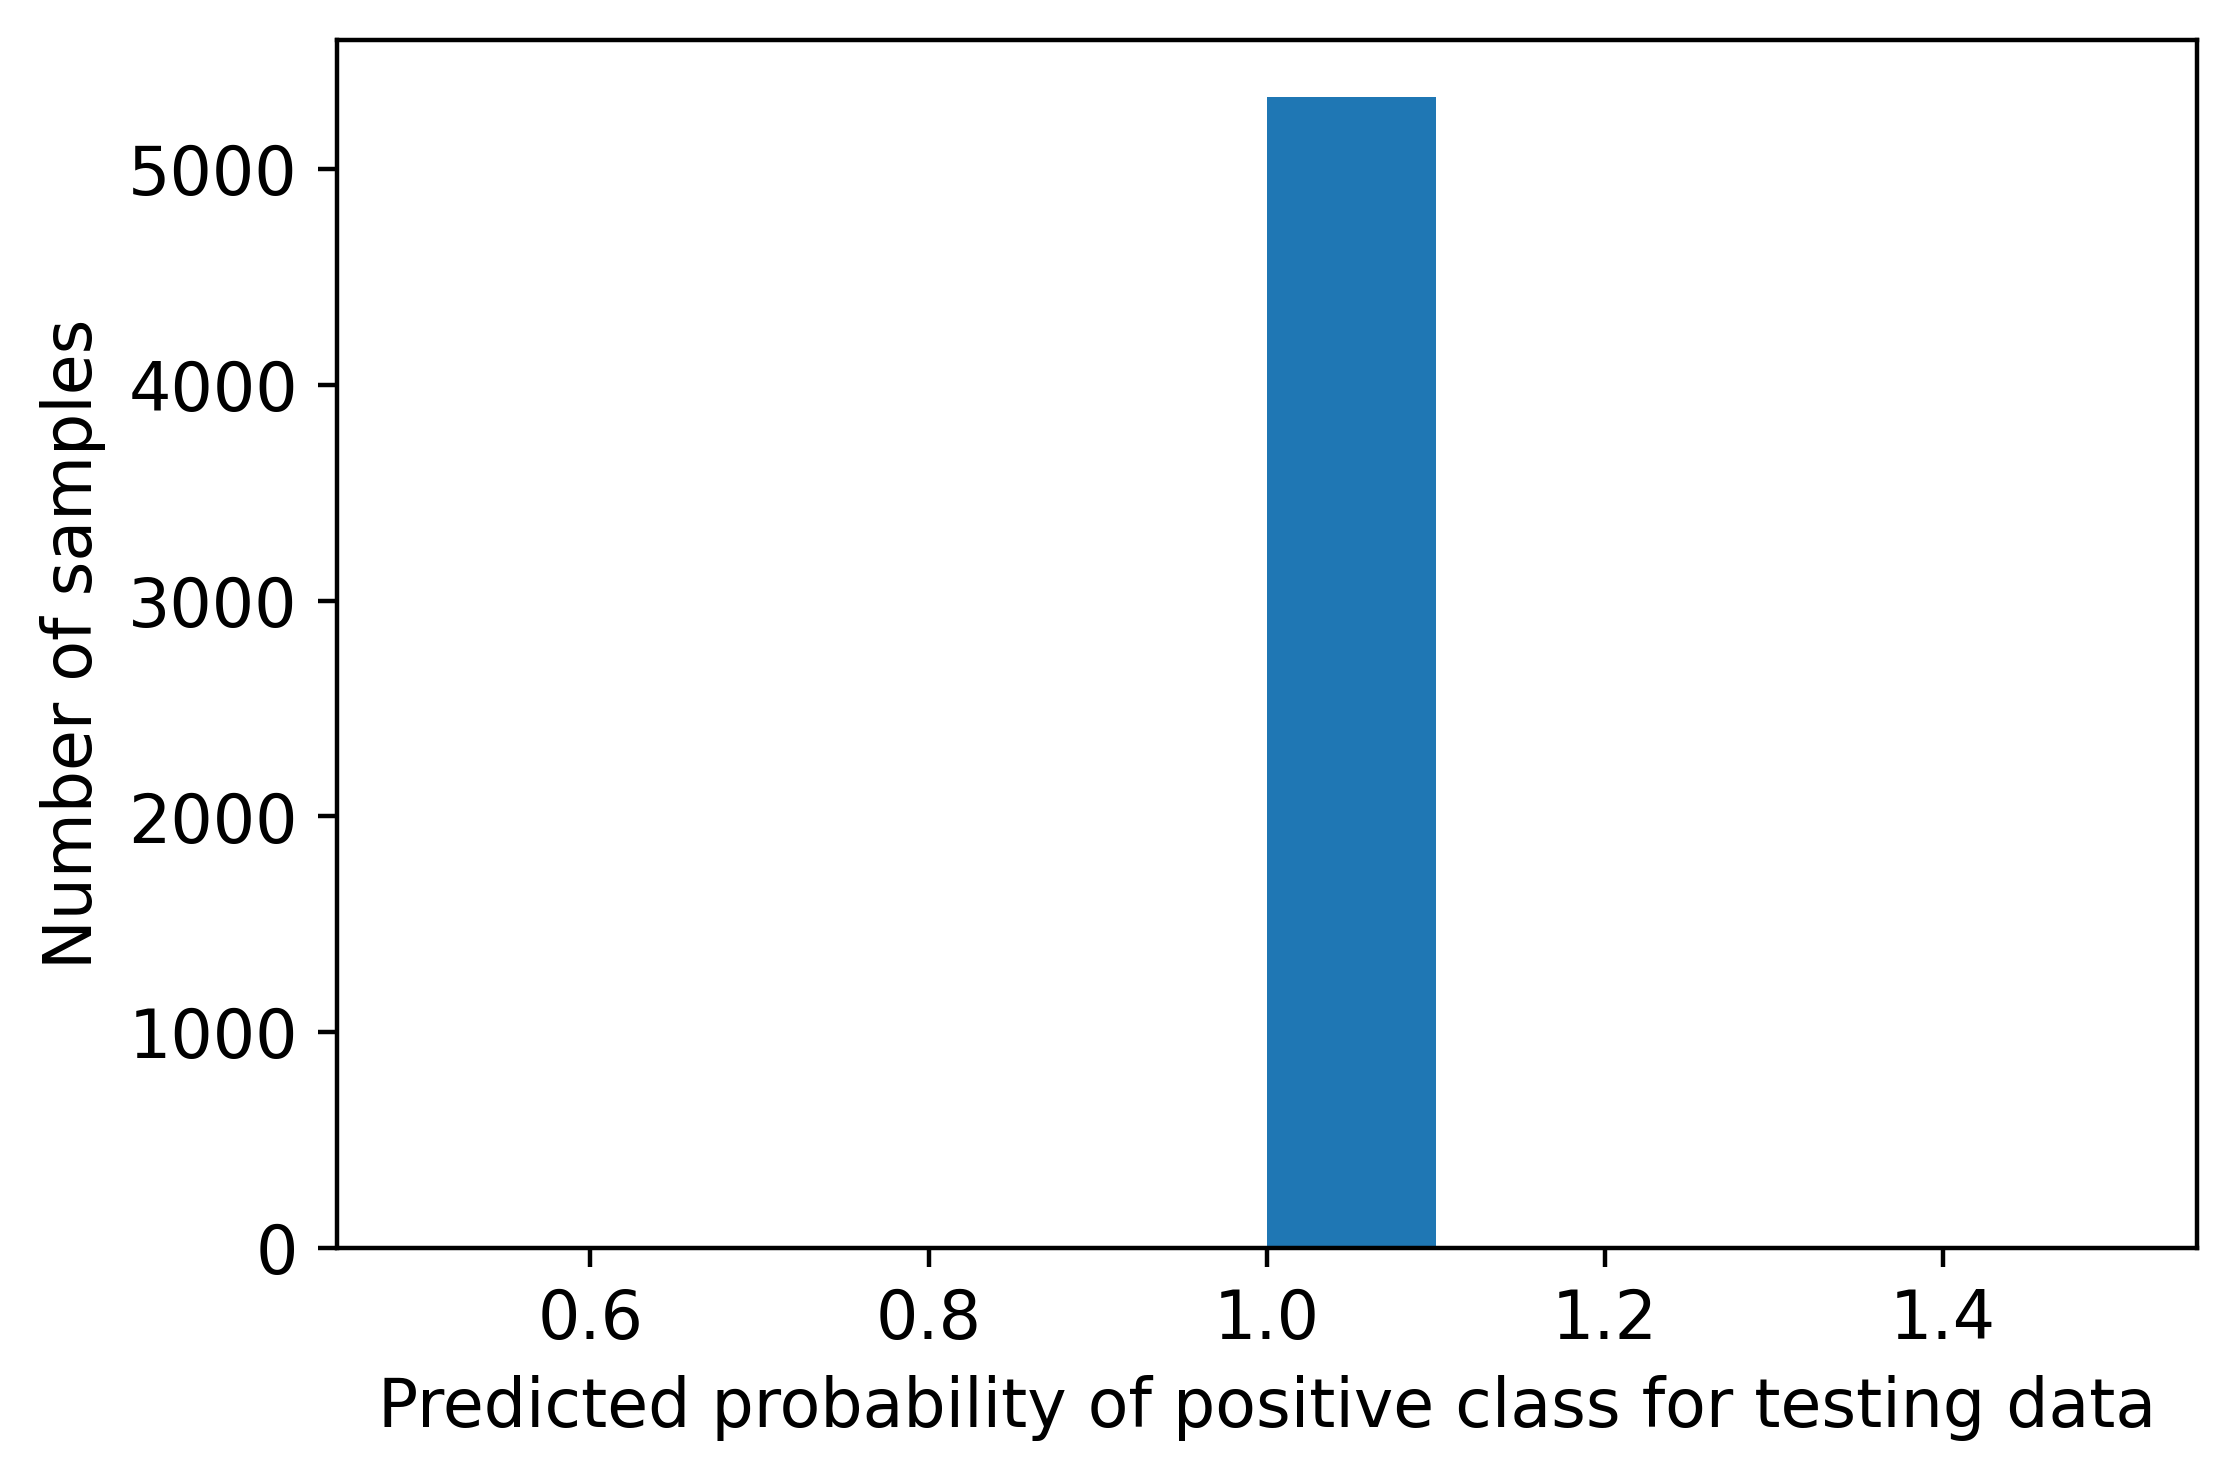

In [217]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba1)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [218]:
pos_sample_pos_proba1 = pos_proba1[y_test==1]
neg_sample_pos_proba1 = pos_proba1[y_test==0]

Text(0, 0.5, 'Number of samples')

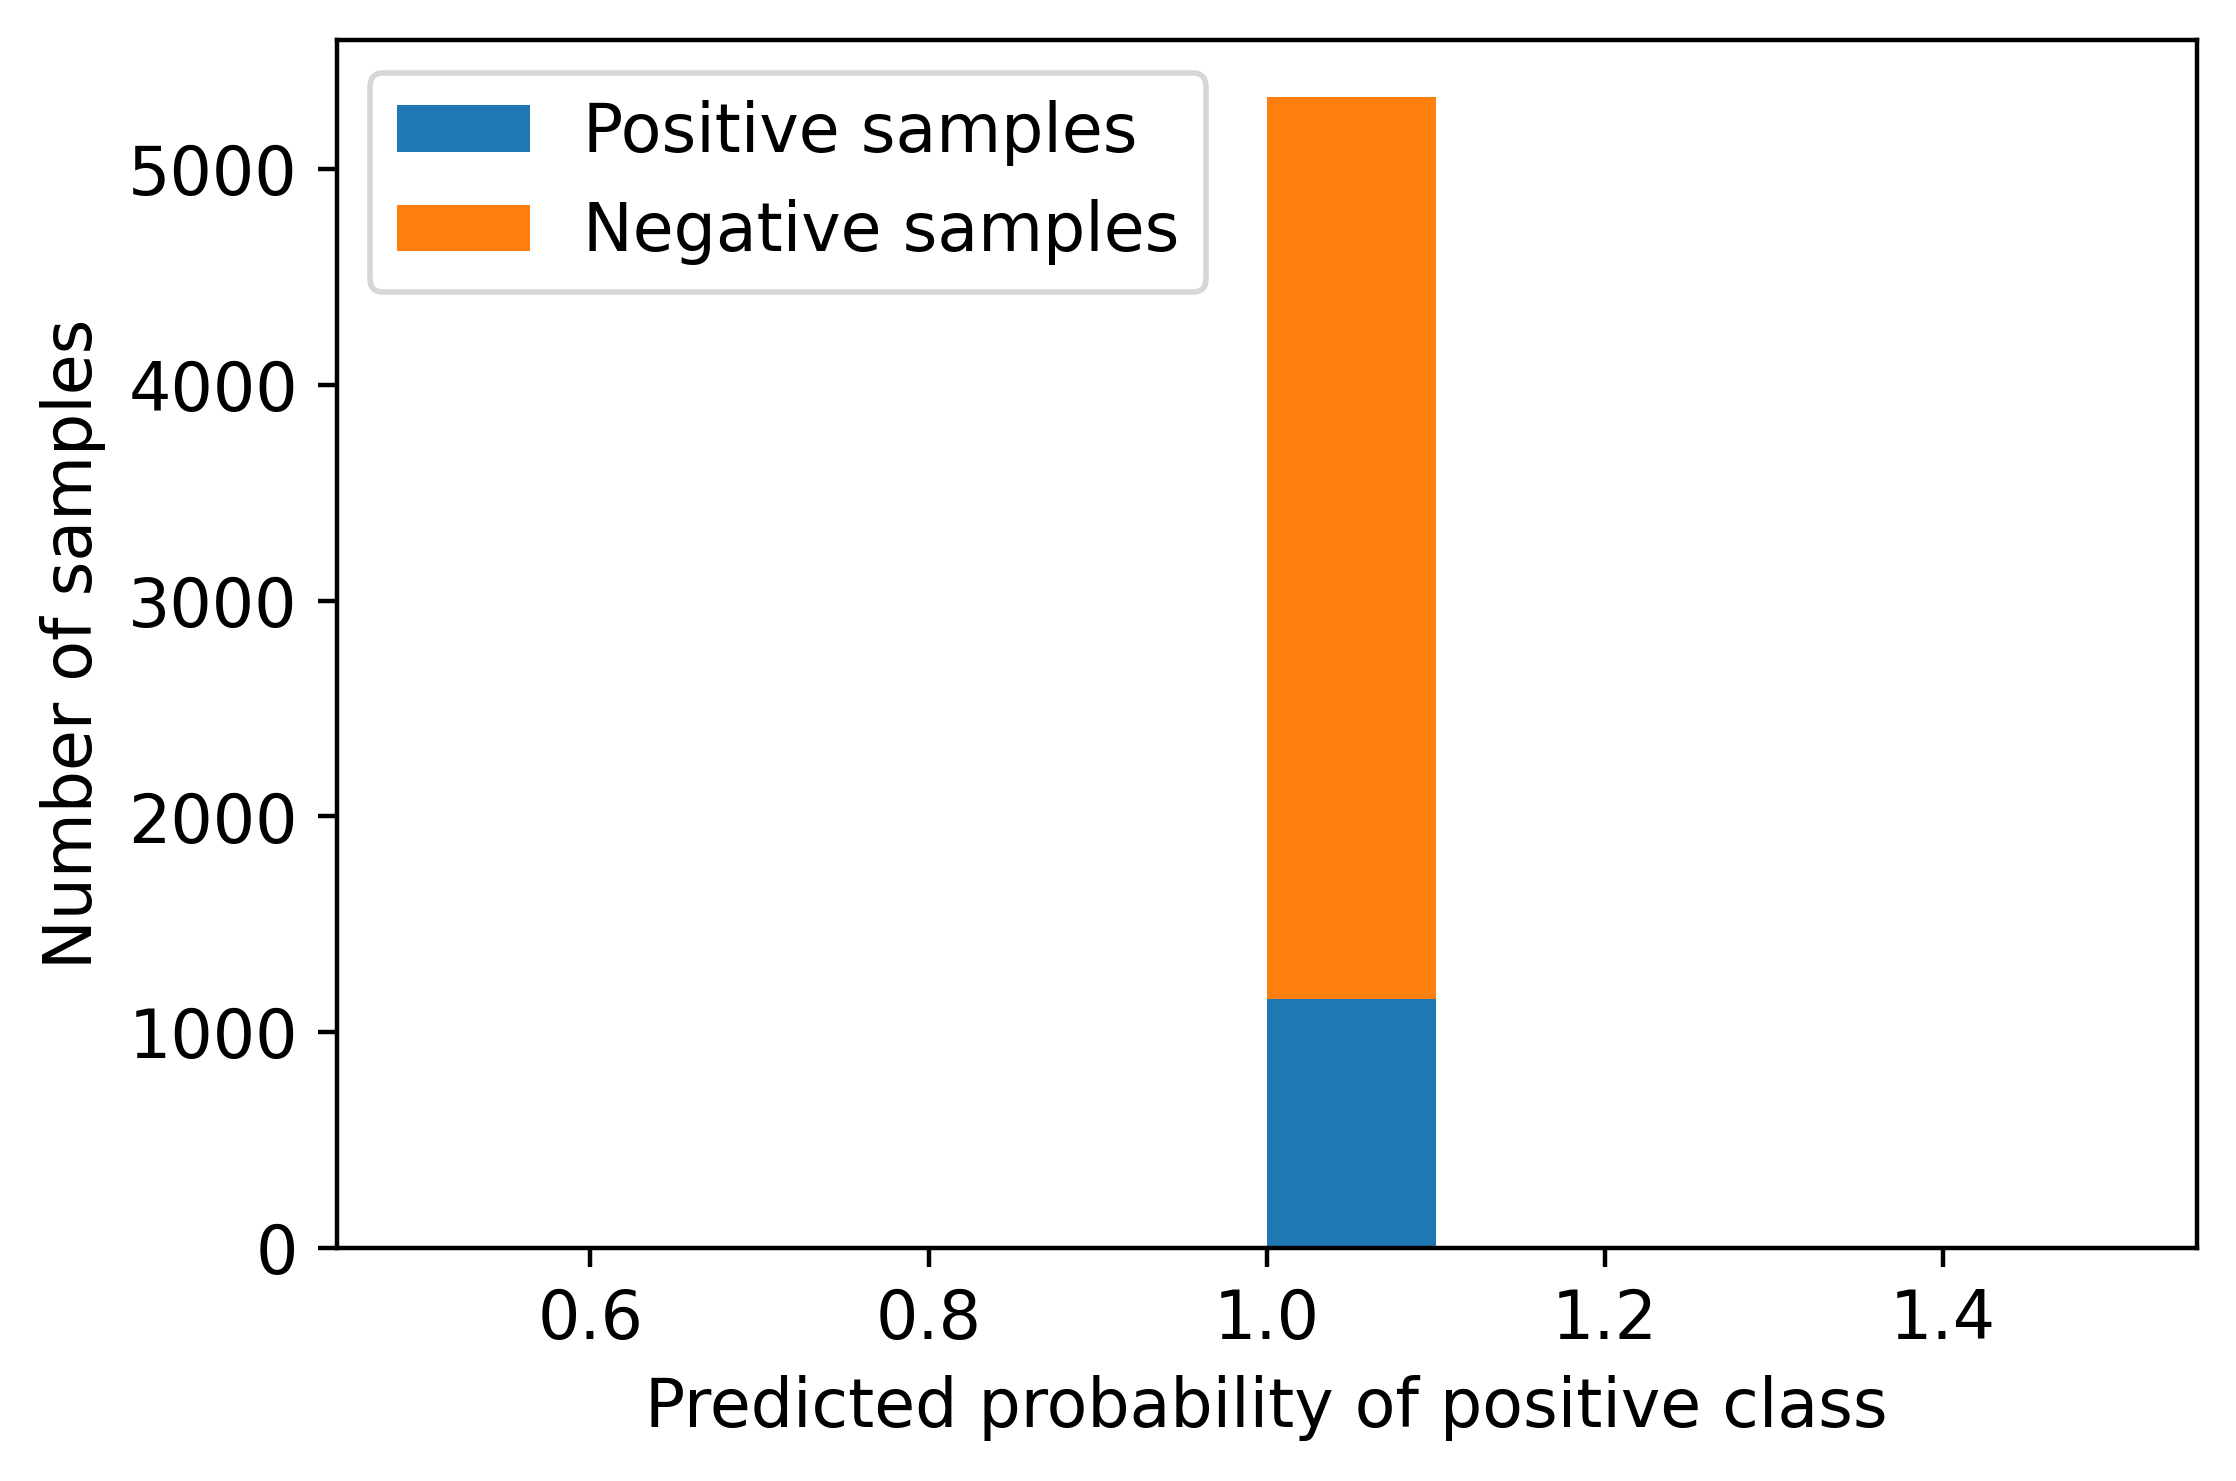

In [219]:
plt.hist([pos_sample_pos_proba1, neg_sample_pos_proba1], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Now, plot the ROC curve.**


In [220]:
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, pos_proba1)

Text(0.5, 1.0, 'ROC curve')

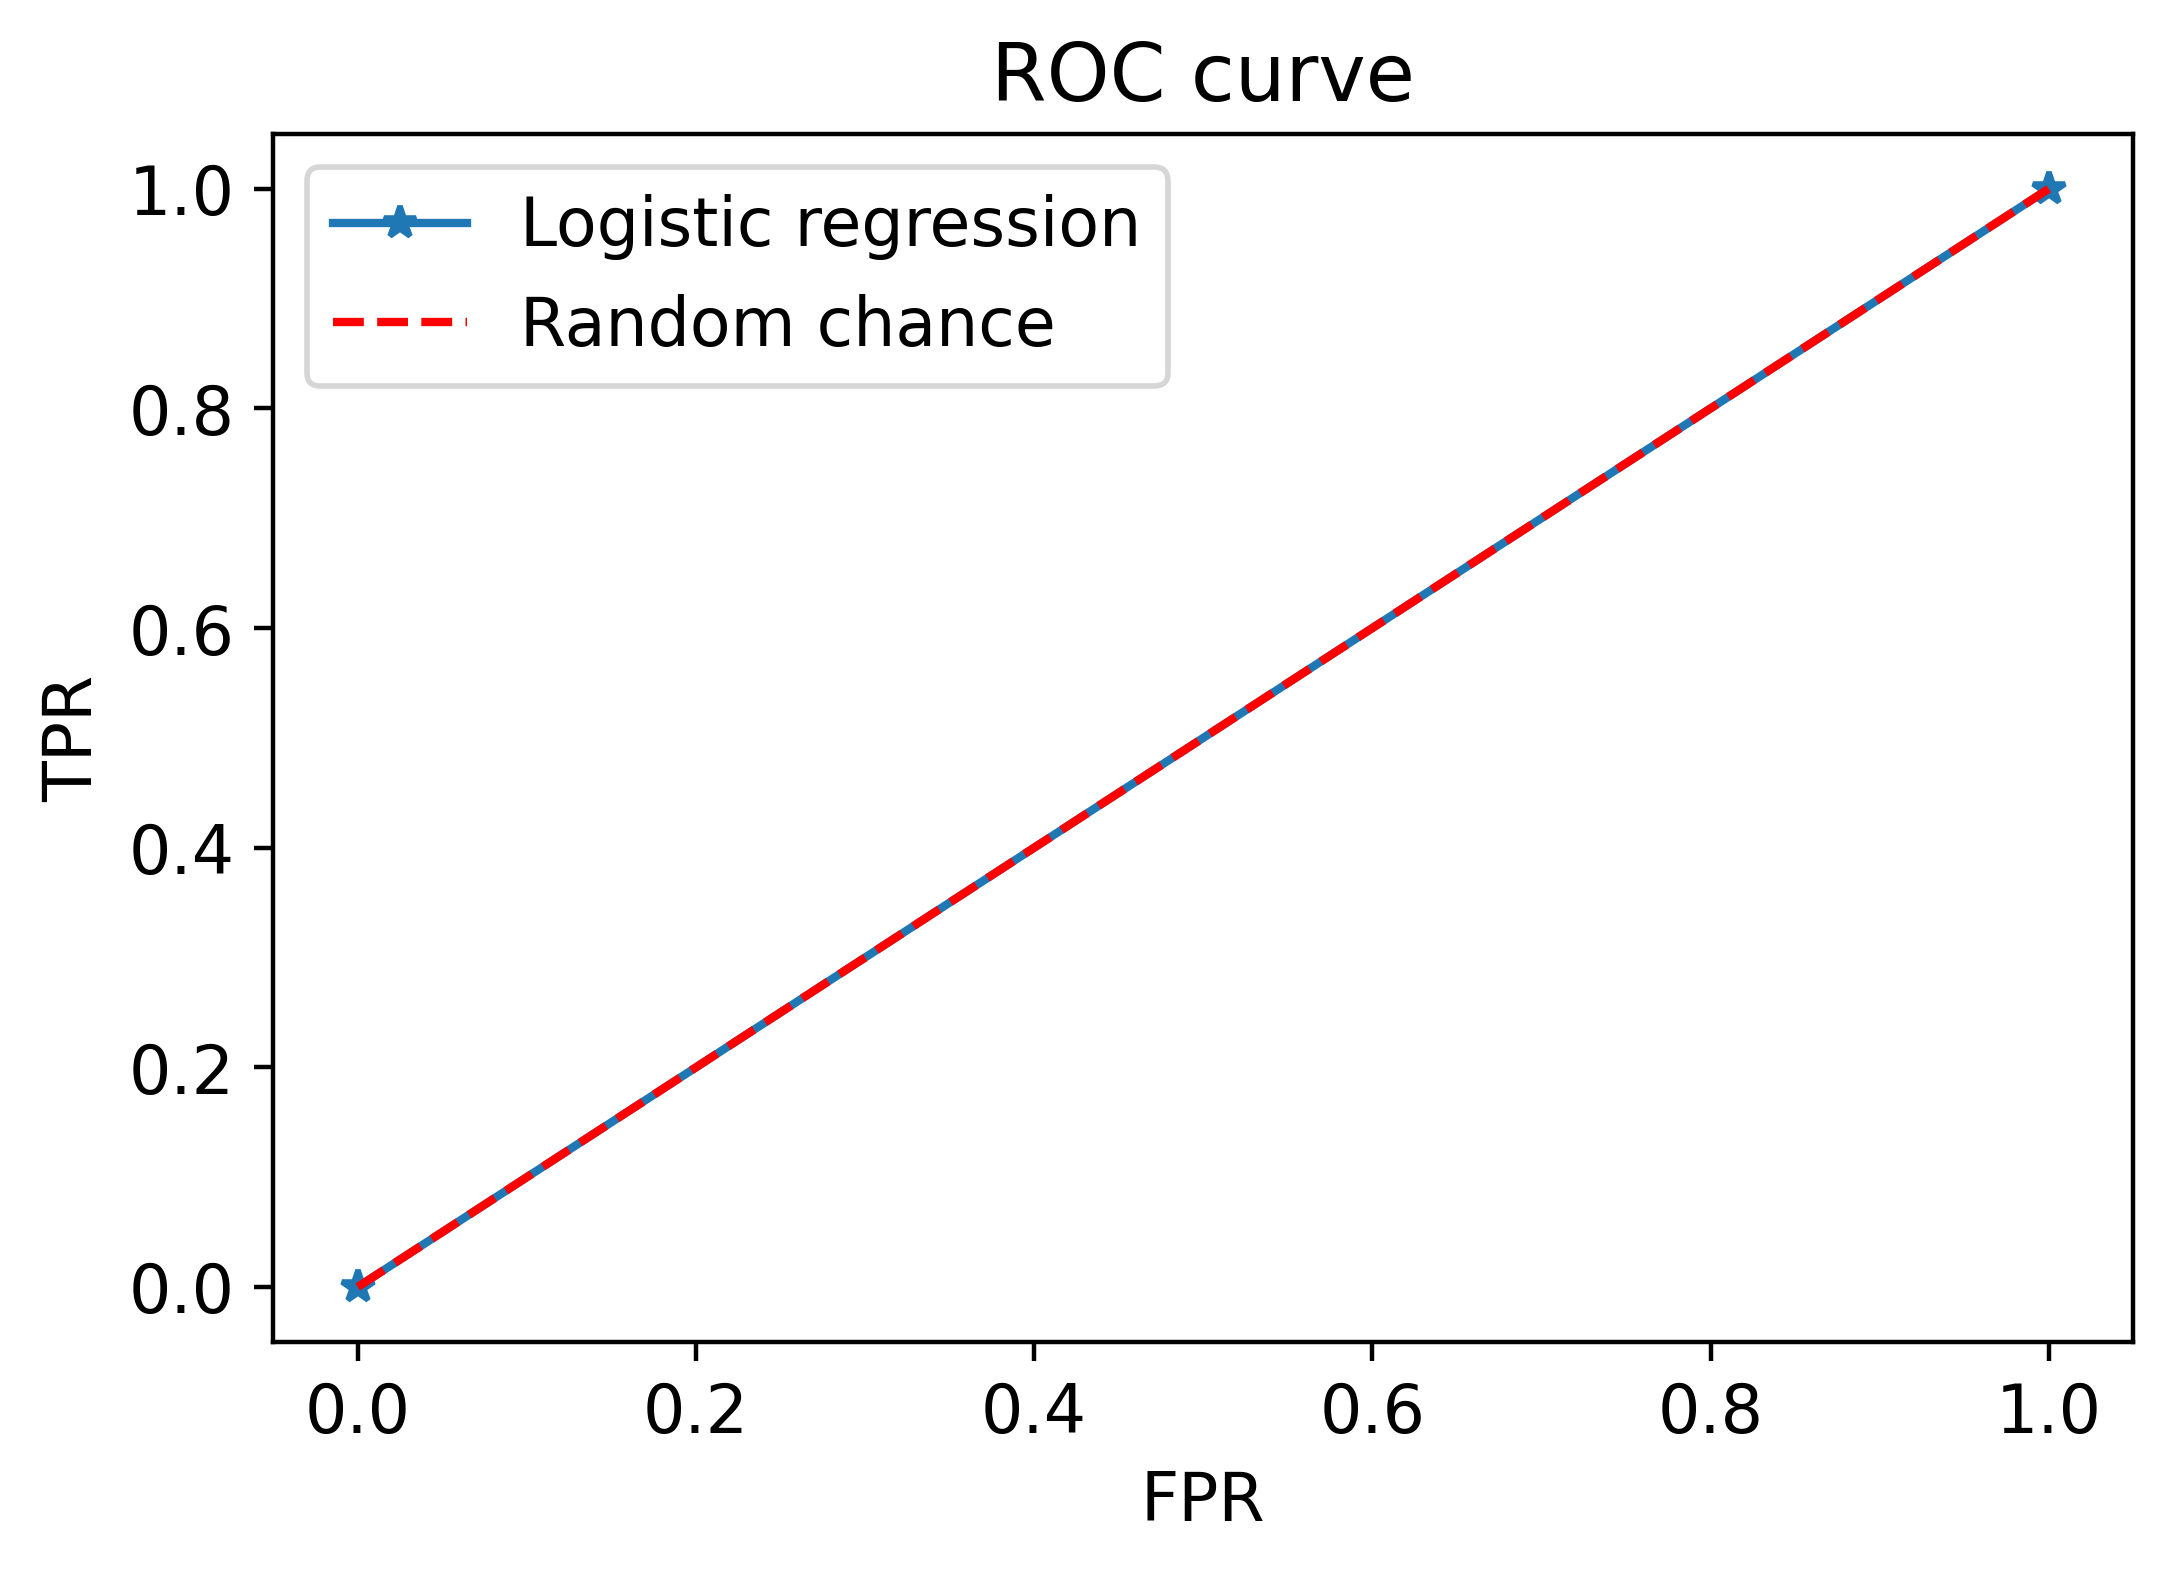

In [221]:
plt.plot(fpr1, tpr1, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [222]:
thresholds

array([2., 1.])

In [223]:
metrics.roc_auc_score(y_test, pos_proba1)

0.5

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [224]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, Y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.22


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.22')

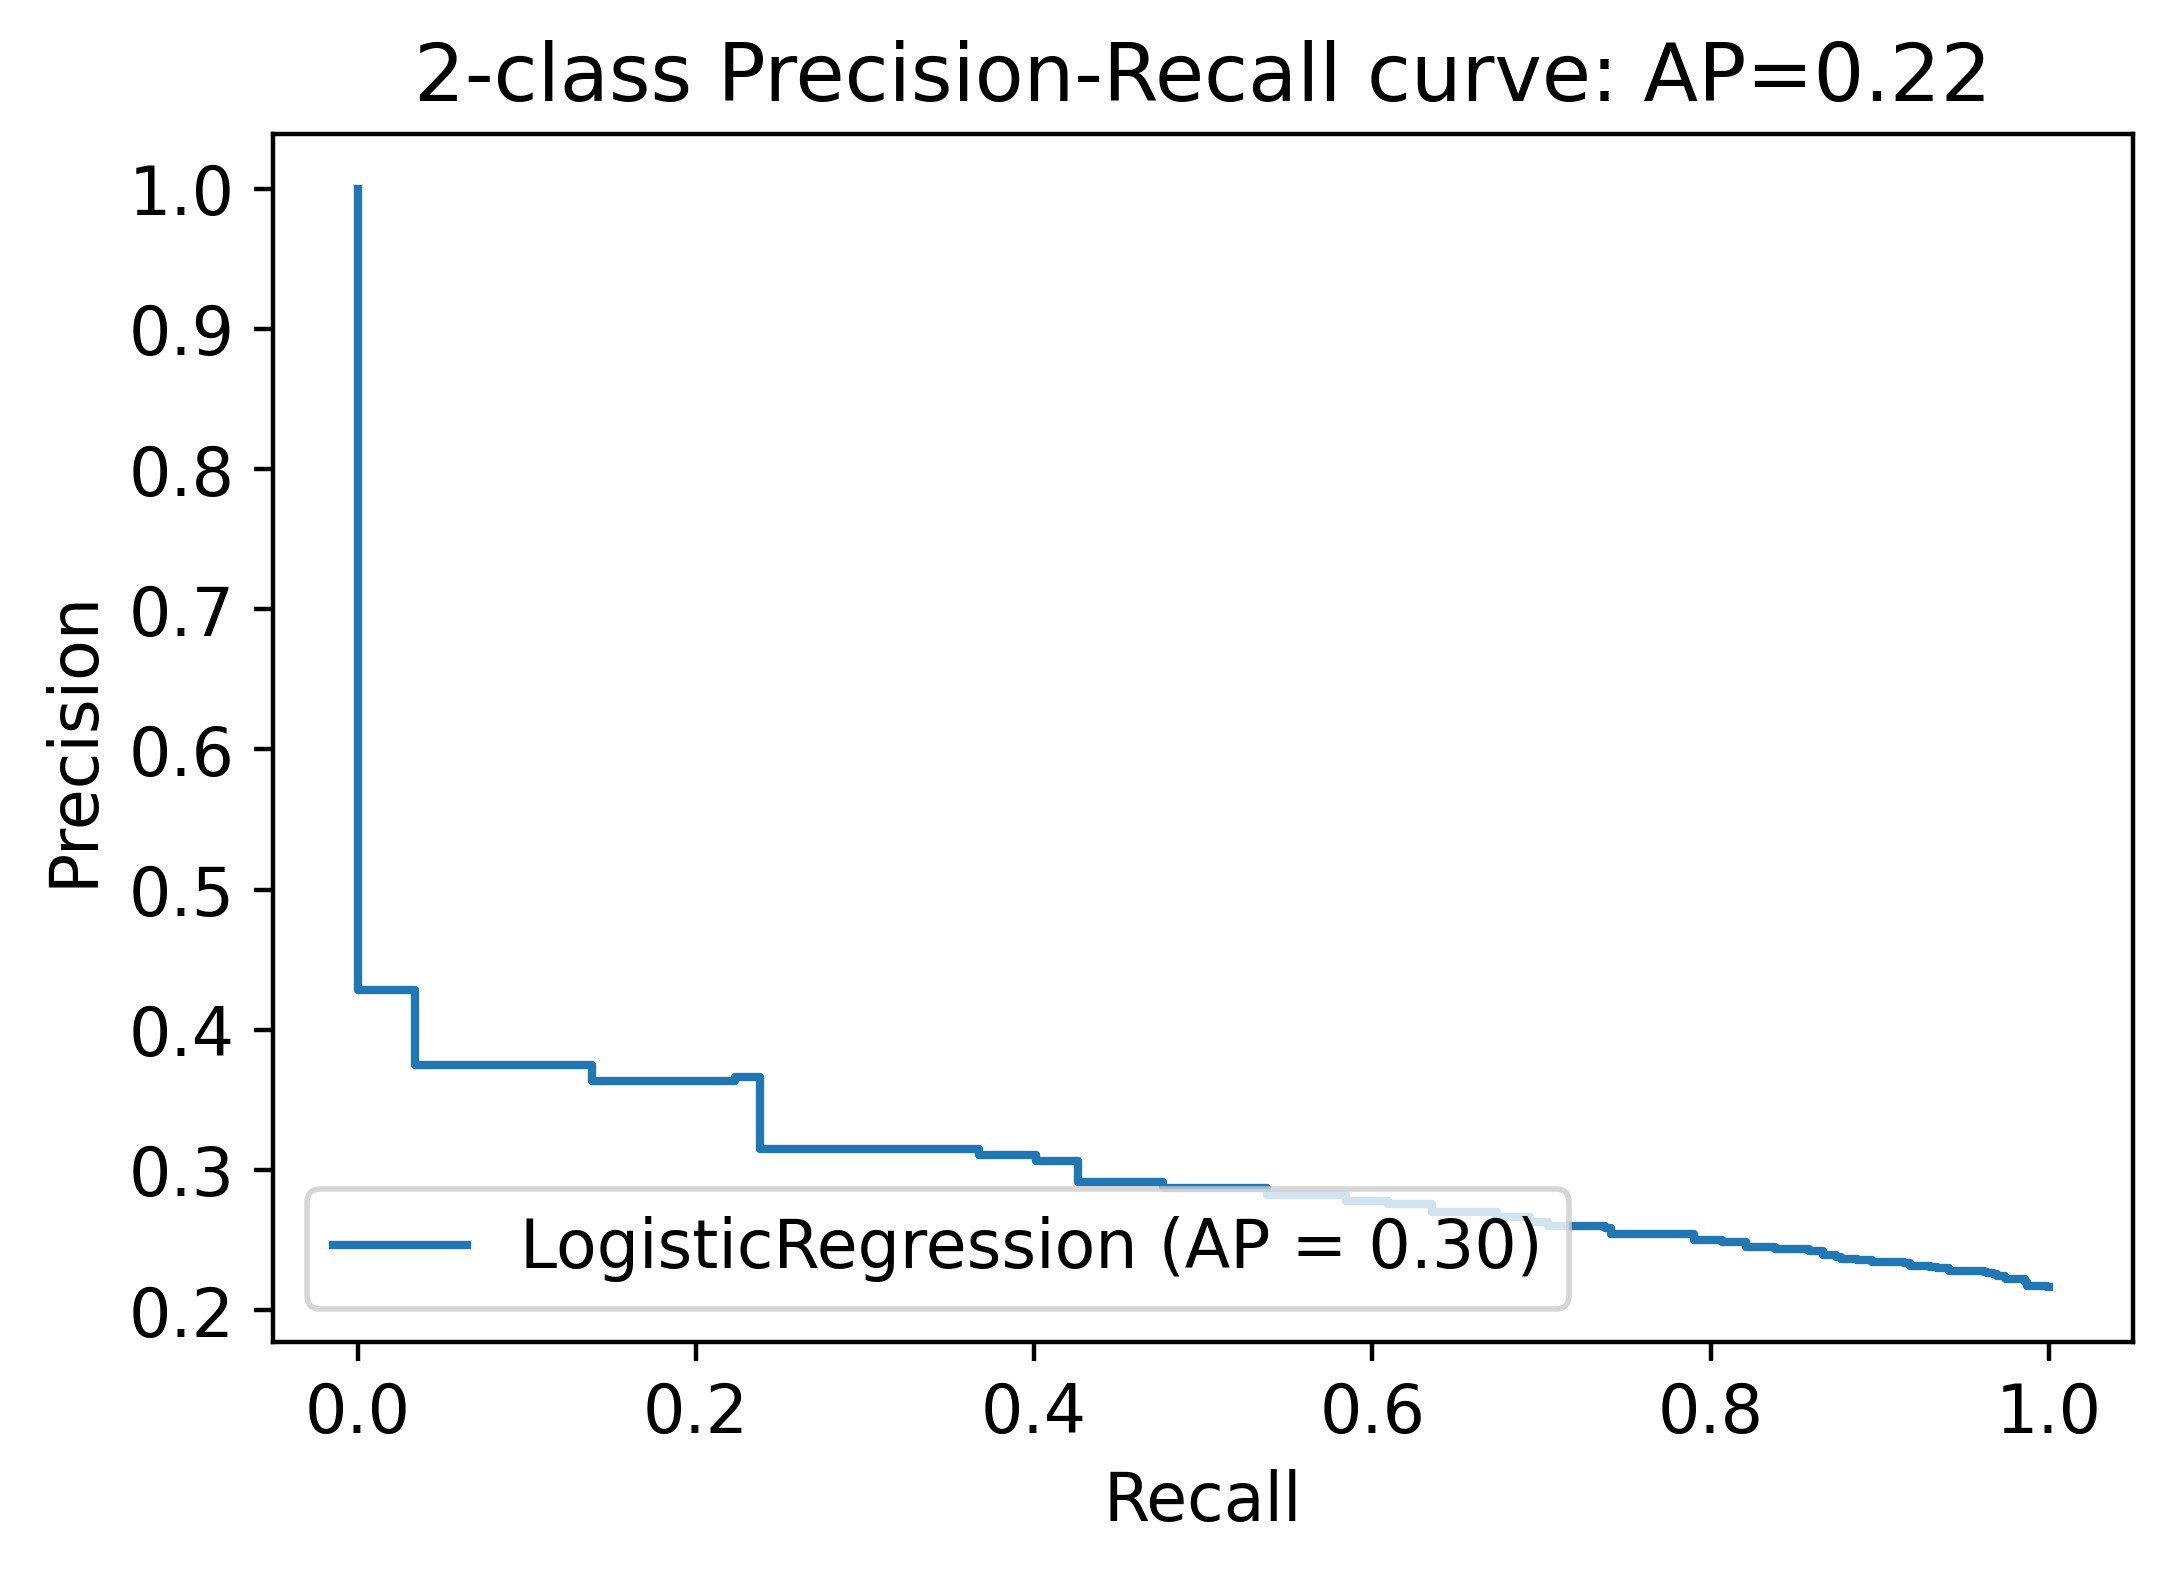

In [225]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

_________________________________________________________________________



**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [226]:
average_precision_score(y_test, clf.predict_proba(X_test)[:,1])

0.29824891448211244

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

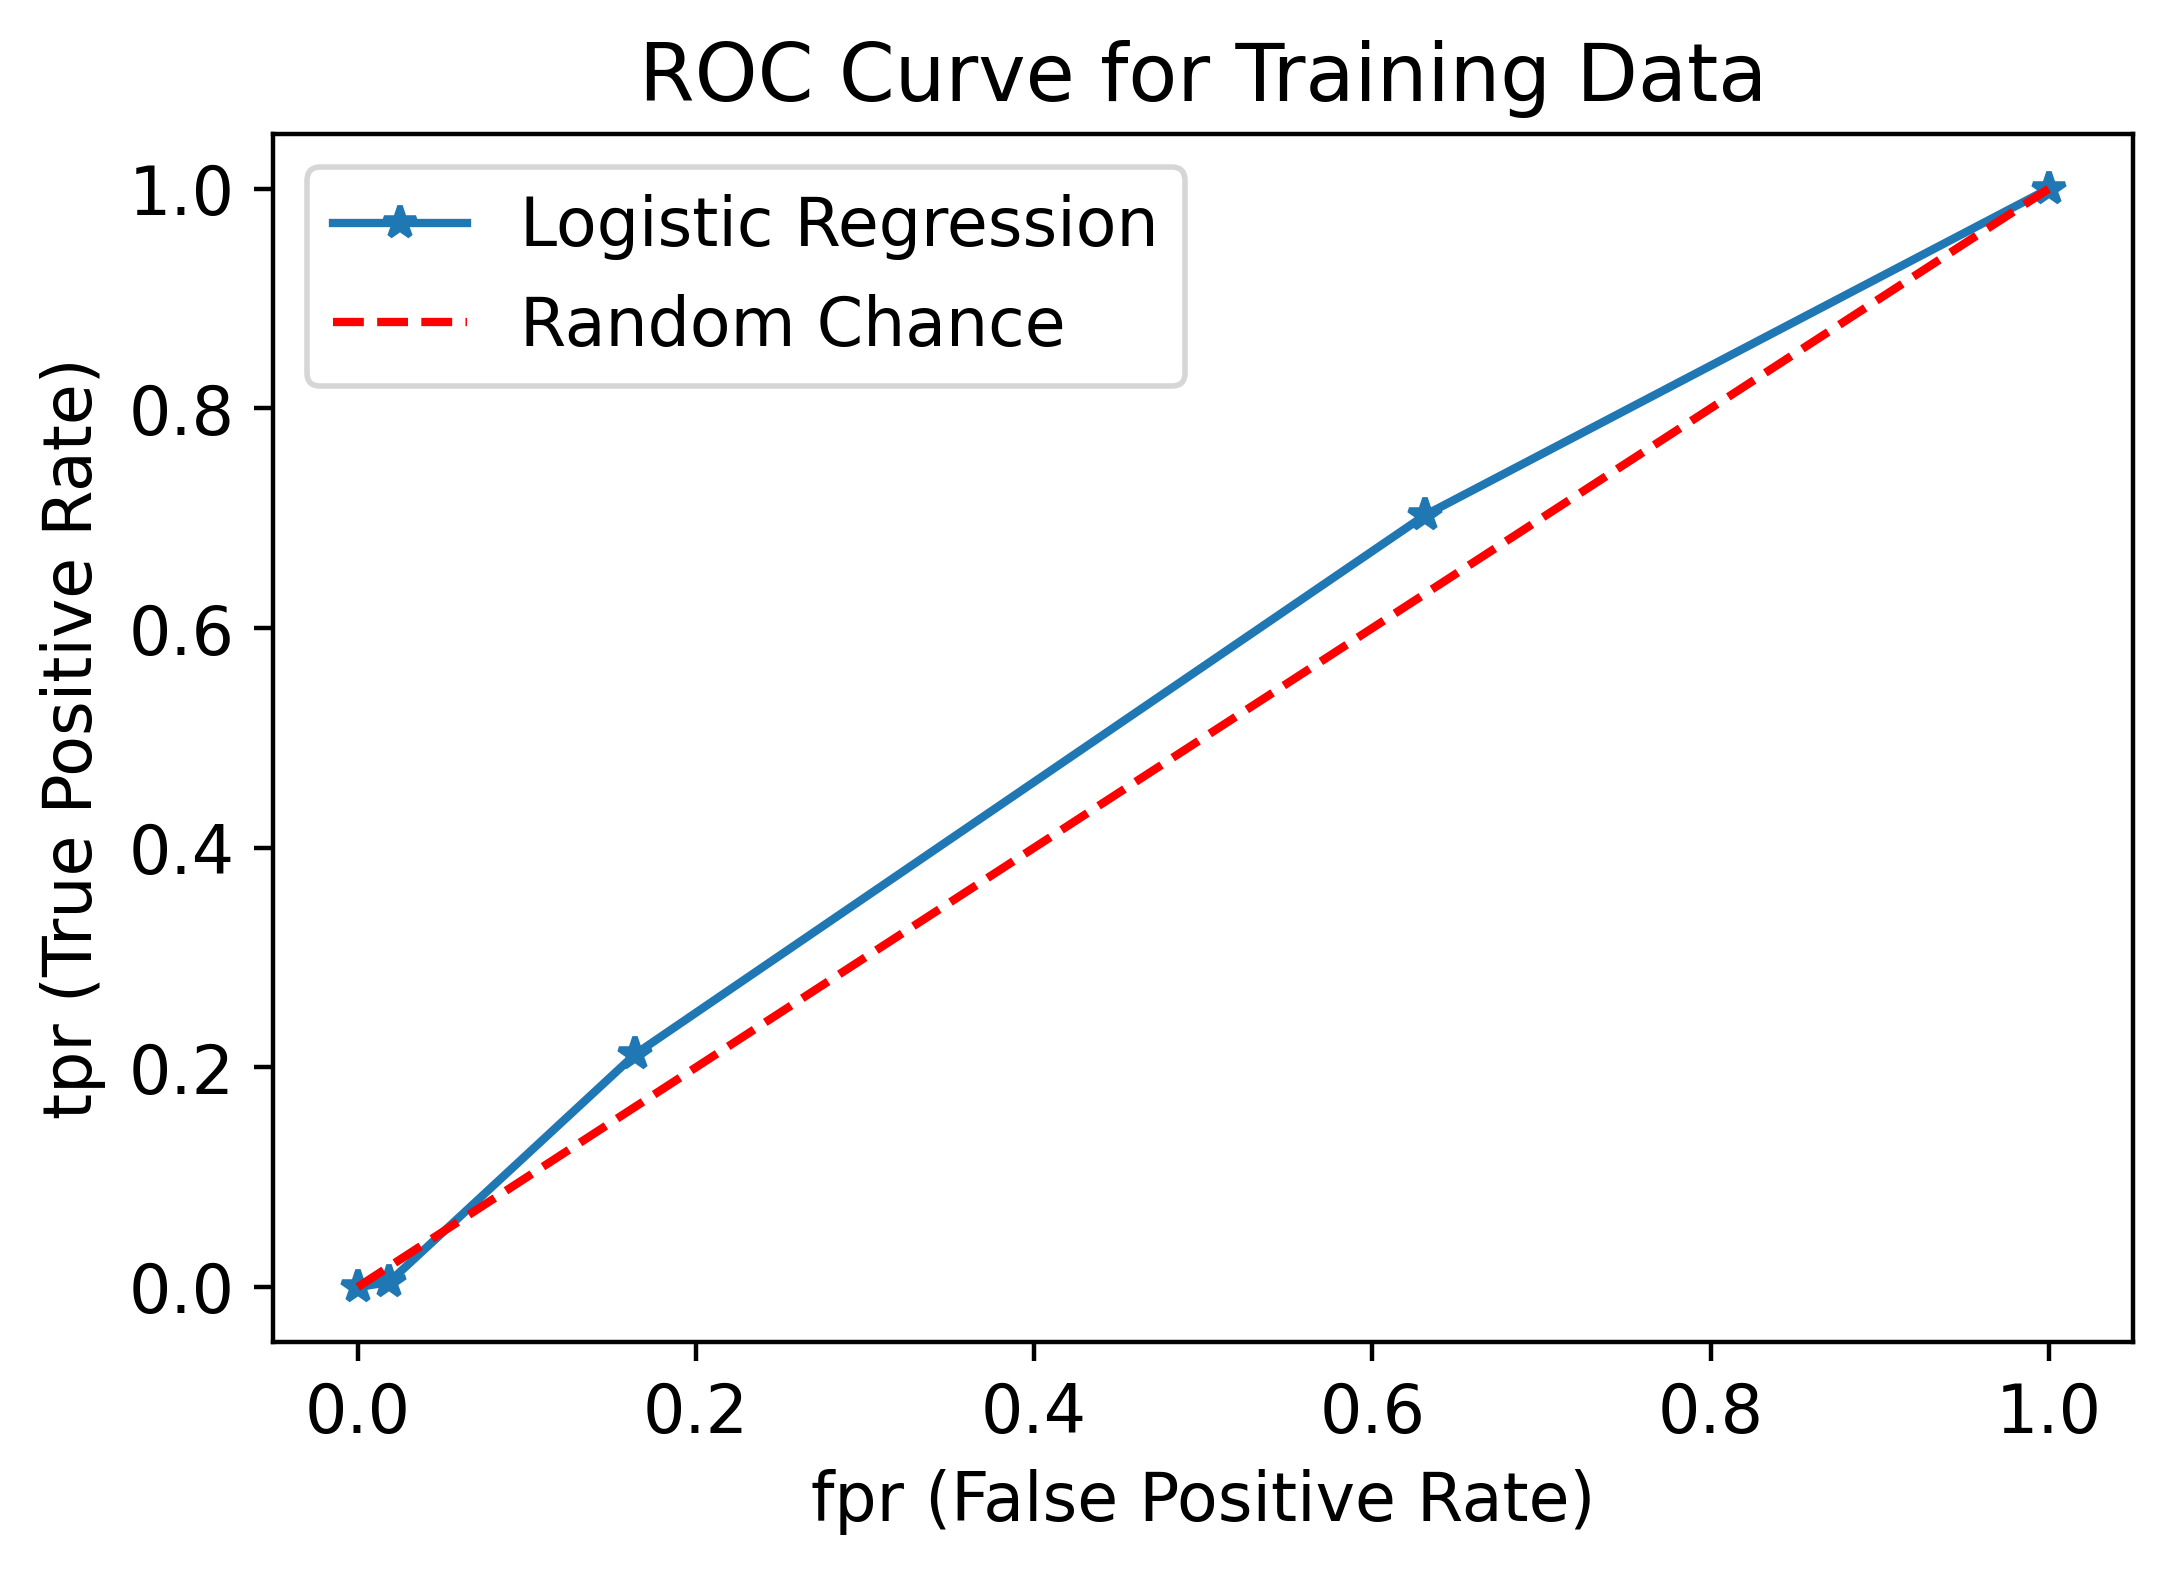

In [240]:
# getting the training samples probability predictions
y_train_prob2 = example_lr.predict_proba(X_train)

# retriving all positiv class probabilities
train_pos_proba = y_train_prob2[:,1]

# getting the required parameters
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, train_pos_proba)

# plotting roc-auc cuve
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve for Training Data')
plt.show()


In [252]:
a = y_train[0:5333]

In [253]:
N2 = sum(a==0)
TN2 = sum((a==0) & (Y_pred==0))
FP2 = sum((a==0) & (Y_pred==1))
TNR2 = TN2/N2
FPR2 = FP2/N2
print('The true negative rate is {} and the false positive rate is {}'.format(TNR2, FPR2))

The true negative rate is 1.0 and the false positive rate is 0.0


In [255]:
a= a.reshape(-1, 1)
y_pred_proba2 = example_lr.predict_proba(a)
y_pred_proba2

array([[0.79038452, 0.20961548],
       [0.79038452, 0.20961548],
       [0.8053357 , 0.1946643 ],
       ...,
       [0.79038452, 0.20961548],
       [0.79038452, 0.20961548],
       [0.8053357 , 0.1946643 ]])

In [256]:
pos_proba2 = y_pred_proba2[:,1]
pos_proba2

array([0.20961548, 0.20961548, 0.1946643 , ..., 0.20961548, 0.20961548,
       0.1946643 ])

In [257]:
metrics.roc_auc_score(a, pos_proba2)

1.0

    How is this different, conceptually and quantitatively, from your earlier calculation?
